Recipe for peak-fitting in a way that handles Bayesian block boundary effects

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

from xrdc import xrdutils
from xrdc import source_separation as sep
from xrdc import featurization as feat
from xrdc import visualization as vis
from xrdc import peak_fitting as pf
from xrdc import workflows
from xrdc import geometry
from xrdc import plotting
from xrdc import refinement
from xrdc import misc

from scipy.ndimage.filters import gaussian_filter as gf
from matplotlib.pyplot import figure

from copy import deepcopy as dc

In [2]:
basepath = "../../../datasets/nate/casettes/"

from glob import glob
import os

paths = glob(basepath + '*csv')

datasets = ([pd.read_csv(p) for p in paths])

In [3]:
threshold = 15
bg_smooth = 0
bg_smooth_post = 20

patterns = pd.DataFrame(d['I'] for d in datasets)
patterns = patterns.values

background, fast_q, slow_T, fast_T = sep.separate_signal(patterns, background_after_filter = False,
                                 threshold = threshold, smooth_q = 1.7, smooth_neighbor_background = 0,
                                smooth_q_background = bg_smooth,
                                 bg_fill_method = 'simple')

(0, 0)


In [4]:
N = len(patterns)
aggregate_uncertainty = np.sqrt((fast_T.std(axis = 0)**2 + background.std(axis = 0)**2) / N)
background = gf(background, (0, bg_smooth_post))
aggregate_uncertainty = gf(aggregate_uncertainty, bg_smooth_post)

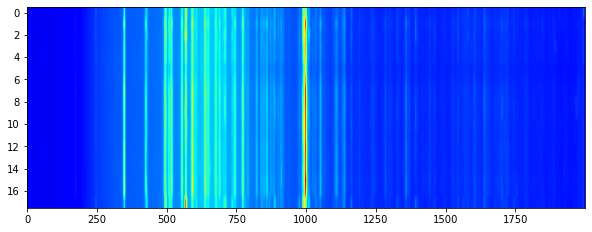

In [5]:
plt.imshow(patterns, aspect = 40, cmap = 'jet')

In [6]:
%matplotlib inline
sep.iplot_rows(patterns, fast_q, background, labels = ['raw', 'extracted'])

interactive(children=(IntSlider(value=8, description='i', max=17), Output(layout=Layout(height='550px'))), _do…

In [7]:
np.random.seed(42)

In [8]:
def mean2d(arr2d):
    return arr2d.mean(axis = 0)[:, None].T

In [11]:
reload(pf.hitp)
reload(pf)
reload(refinement)

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig


<module 'xrdc.refinement' from '/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/refinement.py'>

In [998]:
pf.curvefit_2d(mean2d(patterns - 0), stdratio_threshold = stdratio_threshold,\
                                noise_estimate = aggregate_uncertainty[:, None].T, background = mean2d(background),\
                                bg_shift_pos = True, fit_sigma = True, reg_scale = 1e-1, reg_edge = 0);

numBlocks: 470, dataPts/Block: 4.25531914893617
[   0.   20.  189.  263.  387.  457.  501.  541.  560.  582.  627.  647.
  668.  682.  699.  729.  765.  783.  815.  834.  846.  851.  869.  881.
  898.  903.  967.  978. 1021. 1038. 1083. 1125. 1157. 1169. 1216. 1278.
 1295. 1321. 1348. 1386. 1412. 1456. 1479. 1515. 1539. 1561. 1597. 1623.
 1661. 1717. 1740. 1780. 1840. 1868. 1922. 1953. 1999.]
True
Experimental Info used: 

{'blockBounds_list': [[0.0, 20.0], [20.0, 189.0], [189.0, 263.0], [263.0, 387.0], [387.0, 457.0], [457.0, 501.0], [501.0, 541.0], [541.0, 560.0], [560.0, 582.0], [582.0, 627.0], [627.0, 647.0], [647.0, 668.0], [668.0, 682.0], [682.0, 699.0], [699.0, 729.0], [729.0, 765.0], [765.0, 783.0], [783.0, 815.0], [815.0, 834.0], [834.0, 846.0], [846.0, 851.0], [851.0, 869.0], [869.0, 881.0], [881.0, 898.0], [898.0, 903.0], [903.0, 967.0], [967.0, 978.0], [978.0, 1021.0], [1021.0, 1038.0], [1038.0, 1083.0], [1083.0, 1125.0], [1125.0, 1157.0], [1157.0, 1169.0], [1169.0, 1216.0]

/home/ollie/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Peak at 174, start iteration with error = 0.8425753439128479
64.82217378187222
[ 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188]
Peak at 174, iteration 0: error = 0.2782877056766175
16.642966559676164
[ 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59

Peak at 427, start iteration with error = 0.1265059271394882
97.38065409928647
[387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404
 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422
 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440
 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456]
Peak at 427, iteration 0: error = 0.8709615008685393
236.0896230130288
[387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404
 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422
 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440
 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456]
Peak at 427, iteration 1: error = 0.028291002019251964
10.23097601109992
[387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404
 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422
 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 

Peak at 711, start iteration with error = 0.14000702276751528
12.899704576401273
[699 700 701 702 703 704 705 706 707 708 709 710 711 712 713 714 715 716
 717 718 719 720 721 722 723 724 725 726 727 728]
Peak at 711, iteration 0: error = 0.8602325042093447
52.80126781927467
[699 700 701 702 703 704 705 706 707 708 709 710 711 712 713 714 715 716
 717 718 719 720 721 722 723 724 725 726 727 728]
Peak at 711, iteration 1: error = 0.019650359440926534
1.6167982060294979
bounds ([697.55, -103.8673213388848, 0, 0, 0, 697.55, -103.8673213388848, 0, 0, 0], [729.45, inf, inf, 29.0, 29.0, 729.45, inf, inf, 29.0, 29.0])
[699 700 701 702 703 704 705 706 707 708 709 710 711 712 713 714 715 716
 717 718 719 720 721 722 723 724 725 726 727 728]
Peak at 746, start iteration with error = 0.16842820062516453
22.439348723159544
[729 730 731 732 733 734 735 736 737 738 739 740 741 742 743 744 745 746
 747 748 749 750 751 752 753 754 755 756 757 758 759 760 761 762 763 764]
Peak at 746, iteration 0: error

Peak at 977, start iteration with error = 0.1393618148407495
14.493850385481439
[967 968 969 970 971 972 973 974 975 976 977]
Peak at 977, iteration 0: error = 0.8550537162836549
59.408772774427746
[967 968 969 970 971 972 973 974 975 976 977]
Peak at 977, iteration 1: error = 0.0022080426293882853
0.1844724097977157
bounds ([966.5, -55.8394769496975, 0, 0, 0, 966.5, -55.8394769496975, 0, 0, 0], [977.5, inf, inf, 10.0, 10.0, 977.5, inf, inf, 10.0, 10.0])
[967 968 969 970 971 972 973 974 975 976 977]
Peak at 999, start iteration with error = 0.4312546401648977
83.74296787428341
[ 978  979  980  981  982  983  984  985  986  987  988  989  990  991
  992  993  994  995  996  997  998  999 1000 1001 1002 1003 1004 1005
 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017 1018 1019
 1020]
Peak at 999, iteration 0: error = 0.5353642534164407
44.956498725078696
[ 978  979  980  981  982  983  984  985  986  987  988  989  990  991
  992  993  994  995  996  997  998  999 1000 1001 10

Peak at 1300, iteration 0: error = 0.8386877371904926
81.83563398333635
[1295 1296 1297 1298 1299 1300 1301 1302 1303 1304 1305 1306 1307 1308
 1309 1310 1311 1312 1313 1314 1315 1316 1317 1318 1319 1320]
Peak at 1300, iteration 1: error = 0.019855211593195775
2.232031253004788
bounds ([1293.75, -26.94224527815215, 0, 0, 0, 1293.75, -26.94224527815215, 0, 0, 0], [1321.25, inf, inf, 25.0, 25.0, 1321.25, inf, inf, 25.0, 25.0])
[1295 1296 1297 1298 1299 1300 1301 1302 1303 1304 1305 1306 1307 1308
 1309 1310 1311 1312 1313 1314 1315 1316 1317 1318 1319 1320]
Peak at 1327, start iteration with error = 0.13250562020016213
15.88948798007672
[1321 1322 1323 1324 1325 1326 1327 1328 1329 1330 1331 1332 1333 1334
 1335 1336 1337 1338 1339 1340 1341 1342 1343 1344 1345 1346 1347]
Peak at 1327, iteration 0: error = 0.8548520718786162
73.84619239403042
[1321 1322 1323 1324 1325 1326 1327 1328 1329 1330 1331 1332 1333 1334
 1335 1336 1337 1338 1339 1340 1341 1342 1343 1344 1345 1346 1347]
Peak at 1

Peak at 1605, start iteration with error = 0.09552889767632103
18.305989510116977
[1597 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610
 1611 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622]
Peak at 1605, iteration 0: error = 0.8952569243671206
97.79989323190246
[1597 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610
 1611 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622]
Peak at 1605, iteration 1: error = 0.00352463124232674
0.43066940827009403
bounds ([1595.75, -33.83375729117265, 0, 0, 0, 1595.75, -33.83375729117265, 0, 0, 0], [1623.25, inf, inf, 25.0, 25.0, 1623.25, inf, inf, 25.0, 25.0])
[1597 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610
 1611 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622]
Peak at 1640, start iteration with error = 0.18802424903756348
26.654017871571998
[1623 1624 1625 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636
 1637 1638 1639 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 165

Peak at 1997, start iteration with error = 0.2038808994291027
23.30797955681868
[1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966
 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980
 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998]
Peak at 1997, iteration 0: error = 0.7784857901726281
57.48296302138356
[1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966
 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980
 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998]
Peak at 1997, iteration 1: error = 0.024924638826723466
3.282566327084556
bounds ([1950.75, -28.571019813271448, 0, 0, 0, 1950.75, -28.571019813271448, 0, 0, 0], [2000.25, inf, inf, 45.0, 45.0, 2000.25, inf, inf, 45.0, 45.0])
[1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966
 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980
 1981 1982

In [46]:
stdratio_threshold = 7

# fsub_stop_2d_0 = pf.curvefit_2d(mean2d((patterns - 0)), stdratio_threshold = stdratio_threshold,
#                 noise_estimate = aggregate_uncertainty[:, None].T, background = mean2d(background),
#                 bg_shift_pos = True, fit_sigma = False)

# fit_sigma = True passes the estimated uncertainty to the scipy.fit_curve
fsub_stop_2d_1 = pf.curvefit_2d(mean2d(patterns - 0), stdratio_threshold = stdratio_threshold,\
                                noise_estimate = aggregate_uncertainty[:, None].T, background = mean2d(background),\
                                bg_shift_pos = True, fit_sigma = True, reg_scale = 0, reg_edge = 0);

numBlocks: 470, dataPts/Block: 4.25531914893617
[   0.   20.  189.  263.  387.  457.  501.  541.  560.  582.  627.  647.
  668.  682.  699.  729.  765.  783.  815.  834.  846.  851.  869.  881.
  898.  903.  967.  978. 1021. 1038. 1083. 1125. 1157. 1169. 1216. 1278.
 1295. 1321. 1348. 1386. 1412. 1456. 1479. 1515. 1539. 1561. 1597. 1623.
 1661. 1717. 1740. 1780. 1840. 1868. 1922. 1953. 1999.]
True
Experimental Info used: 

{'blockBounds_list': [[0.0, 20.0], [20.0, 189.0], [189.0, 263.0], [263.0, 387.0], [387.0, 457.0], [457.0, 501.0], [501.0, 541.0], [541.0, 560.0], [560.0, 582.0], [582.0, 627.0], [627.0, 647.0], [647.0, 668.0], [668.0, 682.0], [682.0, 699.0], [699.0, 729.0], [729.0, 765.0], [765.0, 783.0], [783.0, 815.0], [815.0, 834.0], [834.0, 846.0], [846.0, 851.0], [851.0, 869.0], [869.0, 881.0], [881.0, 898.0], [898.0, 903.0], [903.0, 967.0], [967.0, 978.0], [978.0, 1021.0], [1021.0, 1038.0], [1038.0, 1083.0], [1083.0, 1125.0], [1125.0, 1157.0], [1157.0, 1169.0], [1169.0, 1216.0]

/home/ollie/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Peak at 174, start iteration with error = 0.775216711144871
28.20233947185338
[ 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188]
Peak at 174, iteration 0: error = 0.37368911194490845
6.7226407515838025
bounds ([11.6, -9.844046963929706, 0, 0, 0], [196.4, inf, inf, 168.0, 168.0])
[ 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  4

Peak at 711, start iteration with error = 0.46241879545033554
11.774046209117426
[699 700 701 702 703 704 705 706 707 708 709 710 711 712 713 714 715 716
 717 718 719 720 721 722 723 724 725 726 727 728]
Peak at 711, iteration 0: error = 0.4539916256939373
6.193769293945452
bounds ([697.55, -40.53422206587669, 0, 0, 0], [729.45, inf, inf, 29.0, 29.0])
[699 700 701 702 703 704 705 706 707 708 709 710 711 712 713 714 715 716
 717 718 719 720 721 722 723 724 725 726 727 728]
Peak at 746, start iteration with error = 0.5072709025855969
20.89969484469601
[729 730 731 732 733 734 735 736 737 738 739 740 741 742 743 744 745 746
 747 748 749 750 751 752 753 754 755 756 757 758 759 760 761 762 763 764]
Peak at 746, iteration 0: error = 0.4053848470171875
9.938318338525203
[729 730 731 732 733 734 735 736 737 738 739 740 741 742 743 744 745 746
 747 748 749 750 751 752 753 754 755 756 757 758 759 760 761 762 763 764]
Peak at 746, iteration 1: error = 0.14850311278503486
2.113528736694227
bounds 

Peak at 1035, start iteration with error = 0.3077076320574821
8.829407493722767
[1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031 1032 1033 1034
 1035 1036 1037]
Peak at 1035, iteration 0: error = 0.6593914717147639
15.069264889595521
[1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031 1032 1033 1034
 1035 1036 1037]
Peak at 1035, iteration 1: error = 0.058482693588692784
1.5286533459352938
bounds ([1020.2, -18.751131326804284, 0, 0, 0, 1020.2, -18.751131326804284, 0, 0, 0], [1037.8, inf, inf, 16.0, 16.0, 1037.8, inf, inf, 16.0, 16.0])
[1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031 1032 1033 1034
 1035 1036 1037]
Peak at 1053, start iteration with error = 0.71165000051249
44.56052262234384
[1038 1039 1040 1041 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051
 1052 1053 1054 1055 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065
 1066 1067 1068 1069 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079
 1080 1081 1082]
Peak at 1053, iteration 0: error = 0.262206361130726

Peak at 1393, start iteration with error = 0.8040551202223847
25.87390212223486
[1386 1387 1388 1389 1390 1391 1392 1393 1394 1395 1396 1397 1398 1399
 1400 1401 1402 1403 1404 1405 1406 1407 1408 1409 1410 1411]
Peak at 1393, iteration 0: error = 0.5968319044804561
5.112118713014199
bounds ([1384.75, -14.217509448703119, 0, 0, 0], [1412.25, inf, inf, 25.0, 25.0])
[1386 1387 1388 1389 1390 1391 1392 1393 1394 1395 1396 1397 1398 1399
 1400 1401 1402 1403 1404 1405 1406 1407 1408 1409 1410 1411]
Peak at 1444, start iteration with error = 0.7716100831191088
20.663297761129026
[1412 1413 1414 1415 1416 1417 1418 1419 1420 1421 1422 1423 1424 1425
 1426 1427 1428 1429 1430 1431 1432 1433 1434 1435 1436 1437 1438 1439
 1440 1441 1442 1443 1444 1445 1446 1447 1448 1449 1450 1451 1452 1453
 1454 1455]
Peak at 1444, iteration 0: error = 0.24595738048228044
3.8548145439604107
bounds ([1409.85, -9.359619099184478, 0, 0, 0], [1457.15, inf, inf, 43.0, 43.0])
[1412 1413 1414 1415 1416 1417 1418 141

Peak at 1932, start iteration with error = 0.7182794526003958
7.763810560123131
[1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935
 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949
 1950 1951 1952]
Peak at 1932, iteration 0: error = 0.28030691466939434
1.0459544327460544
bounds ([1920.5, -2.9330394388395193, 0, 0, 0], [1953.5, inf, inf, 30.0, 30.0])
[1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935
 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949
 1950 1951 1952]
Peak at 1997, start iteration with error = 0.8407744706802309
22.105929216123634
[1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966
 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980
 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998]
Peak at 1997, iteration 0: error = 0.5064999544849498
4.646438590723078
bounds ([1950.75, -14.297283880766756, 0, 0, 0], [2000.25, i

In [199]:
# fsub_stop_2d_1_filt = refinement.filter_peaks(fsub_stop_2d_1, bounds, boundoffset = 0, buffer= .5)

initial peak count: 104
final peak count: 93


In [47]:
# i, j = 0, 50
# x, y, X, Y, ys, bounds = pf.get_curves(fsub_stop_2d_1, i, j, peak_range_only=False)

fsub_stop_2d_1_filt = refinement.filter_peaks(fsub_stop_2d_1, bounds, 0, boundoffset = 0, buffer= .5,
                                             clip_edges = False)

initial peak count: 85
final peak count: 74


In [117]:
reload(refinement)

<module 'xrdc.refinement' from '/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/refinement.py'>

In [27]:
%pdb

Automatic pdb calling has been turned ON


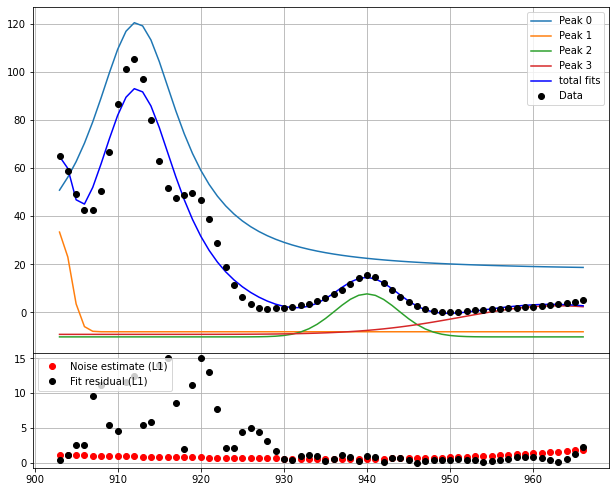

In [51]:
#plot_one_fit(fsub_stop_2d_1, 0, 25);
plotting.plot_one_fit(fsub_stop_2d_1, 0, 25);

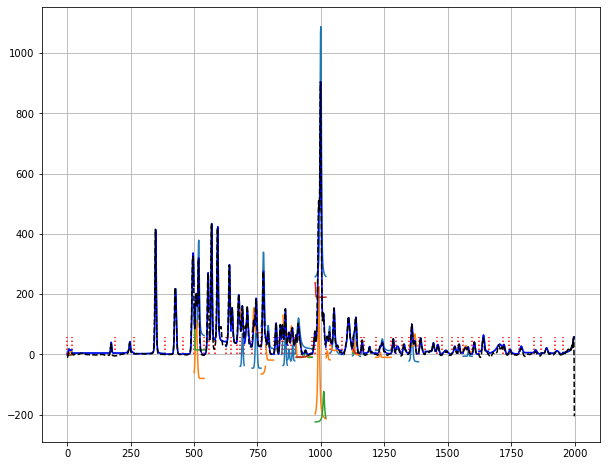

In [57]:
plotting.plot_all_fits(fsub_stop_2d_1, 0);
plt.plot(mean2d(patterns - background)[0], 'k--')
#plt.plot(XX, YY, 'o')

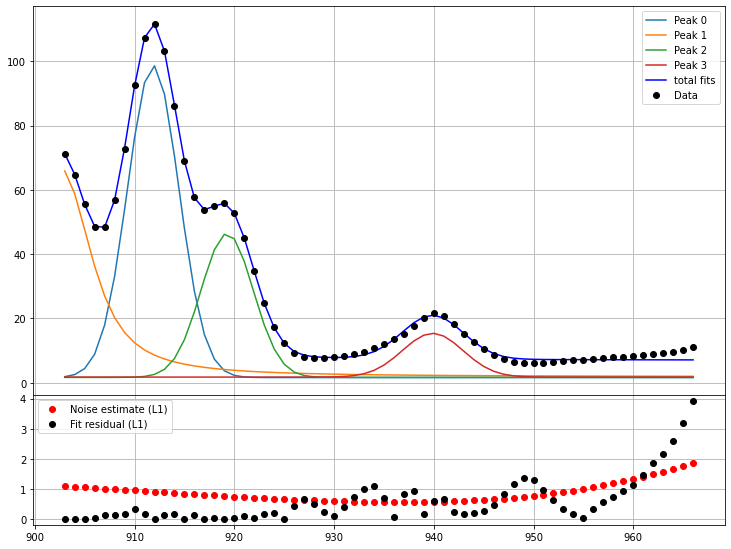

In [10]:
#plot_one_fit(fsub_stop_2d_1, 0, 25);
plotting.plot_one_fit(fsub_stop_2d_1, 0, 25);

In [13]:
i, j = 0, 50
x, y, X, Y, ys, bounds = pf.get_curves(fsub_stop_2d_1, i, j, peak_range_only=False)

In [404]:
reload(refinement)
reload(pf.hitp)
reload(pf)

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig


<module 'xrdc.peak_fitting' from '/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/peak_fitting.py'>

In [286]:
stdratio_threshold

7

In [312]:
# # TODO is there an off by one errror in the block merging?
# # merge adjacent blocks
# overlap = 3
# fsub_stop_2d_3 = pf.refine_2d(mean2d(patterns - 0), pf.merge_fitoutput_blocks(fsub_stop_2d_1_filt, overlap = overlap),\
#             noise_estimate = aggregate_uncertainty[:, None].T, background = mean2d(background),\
#             bg_shift_pos = True, fit_sigma = True, reg_scale = 1e-1, reg_edge = 0,
#             overlap = overlap)

# # remove stray peaks
# fsub_stop_2d_3_filt = refinement.filter_peaks(fsub_stop_2d_3, bounds, boundoffset = 0, buffer = 1)

# # Refine a second time, since peaks may have been removed
# fsub_stop_2d_3_filt = pf.refine_2d(mean2d(patterns - 0), fsub_stop_2d_3_filt,\
#             noise_estimate = aggregate_uncertainty[:, None].T, background = mean2d(background),\
#             bg_shift_pos = True, fit_sigma = True, reg_scale = 1e-1, reg_edge = 0,
#             overlap = overlap)

# arrays_unmerged, paramsLists_unmerged, noiselists_unmerged, xLists_unmerged, yLists_unmerged, curveparams_unmerged =\
#     fsub_stop_2d_1_filt

# fitlists_final = restrict_range(bounds, fsub_stop_2d_3_filt)

def fit_refine(extra_refinements = 2):
    fsub_stop_2d_1 = pf.curvefit_2d(mean2d(patterns - 0), stdratio_threshold = stdratio_threshold,\
                            noise_estimate = aggregate_uncertainty[:, None].T, background = mean2d(background),\
                            bg_shift_pos = True, fit_sigma = True, reg_scale = 1e-1, reg_edge = 0);
    # TODO is there an off by one errror in the block merging?
    # merge adjacent blocks
    overlap = 3
    fsub_stop_2d_3 = pf.refine_2d(mean2d(patterns - 0), pf.merge_fitoutput_blocks(fsub_stop_2d_1_filt, overlap = overlap),\
                noise_estimate = aggregate_uncertainty[:, None].T, background = mean2d(background),\
                bg_shift_pos = True, fit_sigma = True, reg_scale = 1e-1, reg_edge = 0,
                overlap = overlap)

    fsub_stop_2d_3_filt = fsub_stop_2d_3
    
    for _ in range(extra_refinements):
        # remove stray peaks
        fsub_stop_2d_3_filt = refinement.filter_peaks(fsub_stop_2d_3_filt, bounds, boundoffset = 0, buffer = 0.5)
        # Refine again, since peaks may have been removed. May have to do this several times to converge
        fsub_stop_2d_3_filt = pf.refine_2d(mean2d(patterns - 0), fsub_stop_2d_3_filt,\
                    noise_estimate = aggregate_uncertainty[:, None].T, background = mean2d(background),\
                    bg_shift_pos = True, fit_sigma = True, reg_scale = 1e-1, reg_edge = 0,
                    overlap = overlap)


    fitlists_final = restrict_range(bounds, fsub_stop_2d_3_filt)
    return fsub_stop_2d_1, fsub_stop_2d_3, fsub_stop_2d_3_filt, fitlists_final

In [380]:
def fit_refine(extra_refinements = 1, stdratio_threshold = 5):
    noise = aggregate_uncertainty[:, None].T
    fsub_stop_2d_1 = pf.curvefit_2d(mean2d(patterns - 0), stdratio_threshold = stdratio_threshold,\
                            noise_estimate = noise, background = mean2d(background),\
                            bg_shift_pos = True, fit_sigma = True, reg_scale = 0, reg_edge = 0);
    # TODO is there an off by one errror in the block merging?
    # merge adjacent blocks
    overlap = 3
#     fsub_stop_2d_3 = pf.refine_2d(mean2d(patterns - 0), pf.merge_fitoutput_blocks(fsub_stop_2d_1_filt, overlap = overlap),\
#                 noise_estimate = aggregate_uncertainty[:, None].T, background = mean2d(background),\
#                 bg_shift_pos = True, fit_sigma = True, reg_scale = 1e-1, reg_edge = 0,
#                 overlap = overlap)
    fsub_stop_2d_3 = pf.refine_2d(mean2d(patterns - 0), pf.merge_fitoutput_blocks(fsub_stop_2d_1_filt, overlap = overlap),\
                noise_estimate = noise, background = mean2d(background),\
                bg_shift_pos = True, fit_sigma = True, reg_scale = 0, reg_edge = 0,
                overlap = overlap)

    tmp = fsub_stop_2d_3_filt = fsub_stop_2d_3
    
    tmp = pf.refine_2d(mean2d(patterns - 0), fsub_stop_2d_1,\
                noise_estimate = noise, background = mean2d(background),\
                bg_shift_pos = True, fit_sigma = True, reg_scale = 0, reg_edge = 0,
                overlap = 1)
    
    return tmp
    
    for _ in range(extra_refinements):
        # remove stray peaks
        fsub_stop_2d_3_filt = refinement.filter_peaks(fsub_stop_2d_3_filt, bounds, boundoffset = 1, buffer = 0.5)
        # Refine again, since peaks may have been removed. May have to do this several times to converge
        fsub_stop_2d_3_filt = pf.refine_2d(mean2d(patterns - 0), fsub_stop_2d_3_filt,\
                    noise_estimate = noise, background = mean2d(background),\
                    bg_shift_pos = True, fit_sigma = True, reg_scale = 0, reg_edge = 0,
                    overlap = overlap)

    fitlists_final = restrict_range(bounds[1:], fsub_stop_2d_3_filt)
    return fsub_stop_2d_1, fsub_stop_2d_3, fsub_stop_2d_3_filt, fitlists_final, tmp

In [391]:
tmp[-1]

array([list([{'curve 0': {'x0': 7.933533269561051, 'y0': 7.030368186990733, 'I': 49.23336064021377, 'alpha': 2.2152323347836274, 'gamma': 3.9028952954636466e-22, 'leftBnd': [0.09999999999999998, -3.582463222424701, 0, 0, 0], 'rightBnd': [19.9, inf, inf, 18.0, 18.0]}, 'curve 1': {'x0': 14.104932560920899, 'y0': -3.581264444197188, 'I': 127.43686190847642, 'alpha': 4.415410632189764, 'gamma': 4.345451242581849e-19, 'leftBnd': [0.09999999999999998, -3.582463222424701, 0, 0, 0], 'rightBnd': [19.9, inf, inf, 18.0, 18.0]}, 'curve 2': {'x0': 19.803505684151066, 'y0': -2.618277934317946, 'I': 42.127290237081105, 'alpha': 1.3504163148033794, 'gamma': 0.9370159782969698, 'leftBnd': [0.09999999999999998, -3.582463222424701, 0, 0, 0], 'rightBnd': [19.9, inf, inf, 18.0, 18.0]}, 'curve 3': {'x0': 5.639554795109443, 'y0': -1.1683095951903908, 'I': 11.37149749458164, 'alpha': 1.326871631593933, 'gamma': 4.113298972675193e-23, 'leftBnd': [0.09999999999999998, -3.582463222424701, 0, 0, 0], 'rightBnd': [

In [389]:
#%%capture
#fitlists_initial, fsub_stop_2d_3, fsub_stop_2d_3_filt, fitlists_final, tmp = fit_refine(1)
tmp = fit_refine(1)

numBlocks: 470, dataPts/Block: 4.25531914893617
[   0.   20.  189.  263.  387.  457.  501.  541.  560.  582.  627.  647.
  668.  682.  699.  729.  765.  783.  815.  834.  846.  851.  869.  881.
  898.  903.  967.  978. 1021. 1038. 1083. 1125. 1157. 1169. 1216. 1278.
 1295. 1321. 1348. 1386. 1412. 1456. 1479. 1515. 1539. 1561. 1597. 1623.
 1661. 1717. 1740. 1780. 1840. 1868. 1922. 1953. 1999.]
True
Experimental Info used: 

{'blockBounds_list': [[0.0, 20.0], [20.0, 189.0], [189.0, 263.0], [263.0, 387.0], [387.0, 457.0], [457.0, 501.0], [501.0, 541.0], [541.0, 560.0], [560.0, 582.0], [582.0, 627.0], [627.0, 647.0], [647.0, 668.0], [668.0, 682.0], [682.0, 699.0], [699.0, 729.0], [729.0, 765.0], [765.0, 783.0], [783.0, 815.0], [815.0, 834.0], [834.0, 846.0], [846.0, 851.0], [851.0, 869.0], [869.0, 881.0], [881.0, 898.0], [898.0, 903.0], [903.0, 967.0], [967.0, 978.0], [978.0, 1021.0], [1021.0, 1038.0], [1038.0, 1083.0], [1083.0, 1125.0], [1125.0, 1157.0], [1157.0, 1169.0], [1169.0, 1216.0]

/home/ollie/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Peak at 174, start iteration with error = 0.4646777823427635
28.501162959140764
[ 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188]
Peak at 174, iteration 0: error = 0.38184780261131807
15.616272720189663
[ 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  

Peak at 496, start iteration with error = 0.3979506788905762
91.32450171364219
[457 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474
 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492
 493 494 495 496 497 498 499 500]
Peak at 496, iteration 0: error = 0.5297251733442003
6.099322200782389
[457 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474
 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492
 493 494 495 496 497 498 499 500]
Peak at 496, iteration 1: error = 0.05008372737887832
2.3867913989330303
bounds ([454.85, -83.5893107292906, 0, 0, 0, 454.85, -83.5893107292906, 0, 0, 0], [502.15, inf, inf, 43.0, 43.0, 502.15, inf, inf, 43.0, 43.0])
[457 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474
 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492
 493 494 495 496 497 498 499 500]
Peak at 519, start iteration with error = 0.6752565170974152
60.84938505852133
[501 502 503 5

Peak at 824, start iteration with error = 0.6041062588007341
53.19335839746456
[815 816 817 818 819 820 821 822 823 824 825 826 827 828 829 830 831 832
 833]
Peak at 824, iteration 0: error = 0.35822170817255905
9.66013993301493
[815 816 817 818 819 820 821 822 823 824 825 826 827 828 829 830 831 832
 833]
Peak at 824, iteration 1: error = 0.012562096304594124
0.41440928314716985
bounds ([814.1, -28.152614372409722, 0, 0, 0, 814.1, -28.152614372409722, 0, 0, 0], [833.9, inf, inf, 18.0, 18.0, 833.9, inf, inf, 18.0, 18.0])
[815 816 817 818 819 820 821 822 823 824 825 826 827 828 829 830 831 832
 833]
Peak at 841, start iteration with error = 0.6665445336709147
51.85327122479247
[834 835 836 837 838 839 840 841 842 843 844 845]
Peak at 841, iteration 0: error = 0.30584300650452567
12.940104823201933
[834 835 836 837 838 839 840 841 842 843 844 845]
Peak at 841, iteration 1: error = 0.060218341757870546
2.440593282876591
bounds ([833.45, -26.981489036266076, 0, 0, 0, 833.45, -26.9814890362

Peak at 1109, iteration 1: error = 0.14999826774452454
3.987789887148388
bounds ([1080.95, -33.59562170259748, 0, 0, 0, 1080.95, -33.59562170259748, 0, 0, 0], [1126.05, inf, inf, 41.0, 41.0, 1126.05, inf, inf, 41.0, 41.0])
[1083 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096
 1097 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110
 1111 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124]
Peak at 1138, start iteration with error = 0.5685870119577334
62.51402282989922
[1125 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138
 1139 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152
 1153 1154 1155 1156]
Peak at 1138, iteration 0: error = 0.36123921442960555
19.90184580065097
[1125 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138
 1139 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152
 1153 1154 1155 1156]
Peak at 1138, iteration 1: error = 0.19963730791665524
7.047880402726066
[1125 112

Peak at 1393, iteration 1: error = 0.07898848304570179
2.2319037783233293
bounds ([1384.75, -16.33465646359722, 0, 0, 0, 1384.75, -16.33465646359722, 0, 0, 0], [1412.25, inf, inf, 25.0, 25.0, 1412.25, inf, inf, 25.0, 25.0])
[1386 1387 1388 1389 1390 1391 1392 1393 1394 1395 1396 1397 1398 1399
 1400 1401 1402 1403 1404 1405 1406 1407 1408 1409 1410 1411]
Peak at 1444, start iteration with error = 0.46530381605521093
20.663297761129026
[1412 1413 1414 1415 1416 1417 1418 1419 1420 1421 1422 1423 1424 1425
 1426 1427 1428 1429 1430 1431 1432 1433 1434 1435 1436 1437 1438 1439
 1440 1441 1442 1443 1444 1445 1446 1447 1448 1449 1450 1451 1452 1453
 1454 1455]
Peak at 1444, iteration 0: error = 0.46537929831524566
14.432736710595618
[1412 1413 1414 1415 1416 1417 1418 1419 1420 1421 1422 1423 1424 1425
 1426 1427 1428 1429 1430 1431 1432 1433 1434 1435 1436 1437 1438 1439
 1440 1441 1442 1443 1444 1445 1446 1447 1448 1449 1450 1451 1452 1453
 1454 1455]
Peak at 1444, iteration 1: error = 0.

Peak at 1747, start iteration with error = 0.35276064047153677
7.7993485263727065
[1740 1741 1742 1743 1744 1745 1746 1747 1748 1749 1750 1751 1752 1753
 1754 1755 1756 1757 1758 1759 1760 1761 1762 1763 1764 1765 1766 1767
 1768 1769 1770 1771 1772 1773 1774 1775 1776 1777 1778 1779]
Peak at 1747, iteration 0: error = 0.5337108162476982
6.510350772144289
[1740 1741 1742 1743 1744 1745 1746 1747 1748 1749 1750 1751 1752 1753
 1754 1755 1756 1757 1758 1759 1760 1761 1762 1763 1764 1765 1766 1767
 1768 1769 1770 1771 1772 1773 1774 1775 1776 1777 1778 1779]
Peak at 1747, iteration 1: error = 0.07342165855274221
1.0934061627751412
bounds ([1738.05, -5.693604033361696, 0, 0, 0, 1738.05, -5.693604033361696, 0, 0, 0], [1780.95, inf, inf, 39.0, 39.0, 1780.95, inf, inf, 39.0, 39.0])
[1740 1741 1742 1743 1744 1745 1746 1747 1748 1749 1750 1751 1752 1753
 1754 1755 1756 1757 1758 1759 1760 1761 1762 1763 1764 1765 1766 1767
 1768 1769 1770 1771 1772 1773 1774 1775 1776 1777 1778 1779]
Peak at 17

[   0.   20.  189.  263.  387.  457.  501.  541.  560.  582.  627.  647.
  668.  682.  699.  729.  765.  783.  815.  834.  846.  851.  869.  881.
  898.  903.  967.  978. 1021. 1038. 1083. 1125. 1157. 1169. 1216. 1278.
 1295. 1321. 1348. 1386. 1412. 1456. 1479. 1515. 1539. 1561. 1597. 1623.
 1661. 1717. 1740. 1780. 1840. 1868. 1922. 1953. 1999.]
True
Experimental Info used: 

{'blockBounds_list': [[0.0, 263.0], [20.0, 387.0], [189.0, 457.0], [263.0, 501.0], [387.0, 541.0], [457.0, 560.0], [501.0, 582.0], [541.0, 627.0], [560.0, 647.0], [582.0, 668.0], [627.0, 682.0], [647.0, 699.0], [668.0, 729.0], [682.0, 765.0], [699.0, 783.0], [729.0, 815.0], [765.0, 834.0], [783.0, 846.0], [815.0, 851.0], [834.0, 869.0], [846.0, 881.0], [851.0, 898.0], [869.0, 903.0], [881.0, 967.0], [898.0, 978.0], [903.0, 1021.0], [967.0, 1038.0], [978.0, 1083.0], [1021.0, 1125.0], [1038.0, 1157.0], [1083.0, 1169.0], [1125.0, 1216.0], [1157.0, 1278.0], [1169.0, 1295.0], [1216.0, 1321.0], [1278.0, 1348.0], [1295.0

[627 628 629 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644
 645 646 647 648 649 650 651 652 653 654 655 656 657 658 659 660 661 662
 663 664 665 666 667 668 669 670 671 672 673 674 675 676 677 678 679 680
 681]
[647 648 649 650 651 652 653 654 655 656 657 658 659 660 661 662 663 664
 665 666 667 668 669 670 671 672 673 674 675 676 677 678 679 680 681 682
 683 684 685 686 687 688 689 690 691 692 693 694 695 696 697 698]
[668 669 670 671 672 673 674 675 676 677 678 679 680 681 682 683 684 685
 686 687 688 689 690 691 692 693 694 695 696 697 698 699 700 701 702 703
 704 705 706 707 708 709 710 711 712 713 714 715 716 717 718 719 720 721
 722 723 724 725 726 727 728]
[682 683 684 685 686 687 688 689 690 691 692 693 694 695 696 697 698 699
 700 701 702 703 704 705 706 707 708 709 710 711 712 713 714 715 716 717
 718 719 720 721 722 723 724 725 726 727 728 729 730 731 732 733 734 735
 736 737 738 739 740 741 742 743 744 745 746 747 748 749 750 751 752 753
 754 755 756 757 758 7

[1216 1217 1218 1219 1220 1221 1222 1223 1224 1225 1226 1227 1228 1229
 1230 1231 1232 1233 1234 1235 1236 1237 1238 1239 1240 1241 1242 1243
 1244 1245 1246 1247 1248 1249 1250 1251 1252 1253 1254 1255 1256 1257
 1258 1259 1260 1261 1262 1263 1264 1265 1266 1267 1268 1269 1270 1271
 1272 1273 1274 1275 1276 1277 1278 1279 1280 1281 1282 1283 1284 1285
 1286 1287 1288 1289 1290 1291 1292 1293 1294 1295 1296 1297 1298 1299
 1300 1301 1302 1303 1304 1305 1306 1307 1308 1309 1310 1311 1312 1313
 1314 1315 1316 1317 1318 1319 1320]
Optimal parameters not found: The maximum number of function evaluations is exceeded.
peak fitting failed
[1278 1279 1280 1281 1282 1283 1284 1285 1286 1287 1288 1289 1290 1291
 1292 1293 1294 1295 1296 1297 1298 1299 1300 1301 1302 1303 1304 1305
 1306 1307 1308 1309 1310 1311 1312 1313 1314 1315 1316 1317 1318 1319
 1320 1321 1322 1323 1324 1325 1326 1327 1328 1329 1330 1331 1332 1333
 1334 1335 1336 1337 1338 1339 1340 1341 1342 1343 1344 1345 1346 1347]
Opti

[1780 1781 1782 1783 1784 1785 1786 1787 1788 1789 1790 1791 1792 1793
 1794 1795 1796 1797 1798 1799 1800 1801 1802 1803 1804 1805 1806 1807
 1808 1809 1810 1811 1812 1813 1814 1815 1816 1817 1818 1819 1820 1821
 1822 1823 1824 1825 1826 1827 1828 1829 1830 1831 1832 1833 1834 1835
 1836 1837 1838 1839 1840 1841 1842 1843 1844 1845 1846 1847 1848 1849
 1850 1851 1852 1853 1854 1855 1856 1857 1858 1859 1860 1861 1862 1863
 1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877
 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891
 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905
 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919
 1920 1921]
[1840 1841 1842 1843 1844 1845 1846 1847 1848 1849 1850 1851 1852 1853
 1854 1855 1856 1857 1858 1859 1860 1861 1862 1863 1864 1865 1866 1867
 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881
 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894

Optimal parameters not found: The maximum number of function evaluations is exceeded.
peak fitting failed
[541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558
 559]
[560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575 576 577
 578 579 580 581]
[582 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597 598 599
 600 601 602 603 604 605 606 607 608 609 610 611 612 613 614 615 616 617
 618 619 620 621 622 623 624 625 626]
[627 628 629 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644
 645 646]
[647 648 649 650 651 652 653 654 655 656 657 658 659 660 661 662 663 664
 665 666 667]
[668 669 670 671 672 673 674 675 676 677 678 679 680 681]
[682 683 684 685 686 687 688 689 690 691 692 693 694 695 696 697 698]
[699 700 701 702 703 704 705 706 707 708 709 710 711 712 713 714 715 716
 717 718 719 720 721 722 723 724 725 726 727 728]
[729 730 731 732 733 734 735 736 737 738 739 740 741 742 743 744 745 746
 747 748 749 750 751 752 753 754 755 756 757 7

In [383]:
tmp[2][]

array([list([array([0.13671952, 0.13673874, 0.13677829, 0.13684031, 0.13692807,
              0.13704611, 0.13719997, 0.13739616, 0.13764176, 0.13794534,
              0.13831555, 0.13876162, 0.13929323, 0.13992061, 0.14065426,
              0.1415045 , 0.14248175, 0.14359624, 0.14485779]), array([0.14627581, 0.14785905, 0.14961554, 0.15155233, 0.15367566,
              0.15599059, 0.15850085, 0.16120841, 0.16411409, 0.16721753,
              0.17051649, 0.17400738, 0.17768472, 0.18154146, 0.185569  ,
              0.18975702, 0.19409403, 0.19856639, 0.20315827, 0.20785366,
              0.21263478, 0.21748296, 0.22237859, 0.2273011 , 0.23222916,
              0.23714089, 0.24201409, 0.2468263 , 0.2515552 , 0.25617865,
              0.26067457, 0.26502171, 0.2691991 , 0.27318692, 0.27696644,
              0.28052013, 0.28383165, 0.28688611, 0.28966994, 0.29217117,
              0.29437952, 0.29628674, 0.29788628, 0.29917332, 0.30014455,
              0.30079864, 0.3011362 , 0.3011592 ,

In [1013]:
reload(refinement.plotting)
reload(plotting)
reload(refinement)
reload(pf.hitp)
reload(pf)

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig


<module 'xrdc.peak_fitting' from '/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/peak_fitting.py'>

In [476]:
bounds

[1,
 20,
 189,
 263,
 387,
 457,
 501,
 541,
 560,
 582,
 627,
 647,
 668,
 682,
 699,
 729,
 765,
 783,
 815,
 834,
 846,
 851,
 869,
 881,
 898,
 903,
 967,
 978,
 1021,
 1038,
 1083,
 1125,
 1157,
 1169,
 1216,
 1278,
 1295,
 1321,
 1348,
 1386,
 1412,
 1456,
 1479,
 1515,
 1539,
 1561,
 1597,
 1623,
 1661,
 1717,
 1740,
 1780,
 1840,
 1868,
 1922,
 1953]

In [627]:
fsub_stop_2d_3[-1][0][0]

{'curve 0': {'x0': 8.614089947964292,
  'y0': 5.504484112802715,
  'I': 35.87708976269221,
  'alpha': 1.9319594620252616,
  'gamma': 3.775320806050395e-06,
  'leftBnd': [0.09999999999999998, -3.582463222424701, 0, 0, 0],
  'rightBnd': [19.9, inf, inf, 4.5, 4.5]},
 'curve 1': {'x0': 174.0464328737253,
  'y0': 0.22169827225055871,
  'I': 195.03587106434955,
  'alpha': 2.5327177373594956,
  'gamma': 5.043464828881877e-34,
  'leftBnd': [11.6, -10.8310300409025, 0, 0, 0],
  'rightBnd': [196.4, inf, inf, 42.0, 42.0]},
 'curve 2': {'x0': 247.59777781181475,
  'y0': 2.009519351447147,
  'I': 416.4978073332902,
  'alpha': 2.180961745744035e-09,
  'gamma': 3.2904601325581266,
  'leftBnd': [185.35, -11.4328216644062, 0, 0, 0],
  'rightBnd': [265.65, inf, inf, 18.25, 18.25]},
 'curve 3': {'x0': 13.978736501615483,
  'y0': -2.6543189858103124,
  'I': 107.80217026586718,
  'alpha': 3.9551899755310855,
  'gamma': 2.6509386663004088e-05,
  'leftBnd': [0.09999999999999998, -3.582463222424701, 0, 0, 0],

IndexError: boolean index did not match indexed array along dimension 0; dimension is 4 but corresponding boolean dimension is 8

> /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/refinement.py(99)filter_peaks()
     97             list(retained_peaks)
     98         ))
---> 99         summary_filt.append(list_to_dict(list(np.array(list(summary[i].values()))[mask])))
    100 
    101     summary_filt_ndarr = np.empty(1, dtype = object)

ipdb> p i
0
ipdb> p params[i]
{'curve 0': {'x0': 8.614089947964292, 'y0': 5.504484112802715, 'I': 35.87708976269221, 'alpha': 1.9319594620252616, 'gamma': 3.775320806050395e-06, 'leftBnd': [0.09999999999999998, -3.582463222424701, 0, 0, 0], 'rightBnd': [19.9, inf, inf, 4.5, 4.5]}, 'curve 1': {'x0': 174.0464328737253, 'y0': 0.22169827225055871, 'I': 195.03587106434955, 'alpha': 2.5327177373594956, 'gamma': 5.043464828881877e-34, 'leftBnd': [11.6, -10.8310300409025, 0, 0, 0], 'rightBnd': [196.4, inf, inf, 42.0, 42.0]}, 'curve 2': {'x0': 247.59777781181475, 'y0': 2.009519351447147, 'I': 416.4978073332902, 'alpha': 2.180961745744035e-09, 'gamma': 3.290460132

In [529]:
fsub_stop_2d_3_filt_bg = refinement.insert_background(fsub_stop_2d_3_filt, [YY])

In [527]:
fsub_stop_2d_3_filt_bg[-1][0][0]

{'curve 0': {'x0': 174.05427844074333,
  'y0': -0.9327277992284198,
  'I': 181.48683569270574,
  'alpha': 2.421258757042071,
  'gamma': 1.5287901245480313e-34,
  'leftBnd': [11.6, -8.30720346079786, 0, 0, 0],
  'rightBnd': [196.4, inf, inf, 42.0, 42.0],
  'background': array([ 6.39311103,  6.39322822,  6.3948294 ,  6.43857936,  7.05457819,
          9.90576867, 13.29340344, 13.61982796, 13.45795461, 12.73246153,
         11.72690723, 11.86634547, 12.749691  , 13.22924003, 12.85755268,
         12.03384219, 11.49487313, 11.62519072, 12.07758437, 12.08800897,
         11.21448956,  9.72045448,  8.24106084,  7.21566216,  6.68658218,
          6.47765923,  6.41361158,  6.39827172,  6.39542893,  6.39507005,
          6.39509778,  6.39517368,  6.39525524,  6.39533831,  6.39542256,
          6.39550802,  6.39559469,  6.39568261,  6.3957718 ,  6.39586228,
          6.39595407,  6.39604721,  6.39614171,  6.39623761,  6.39633494,
          6.39643371,  6.39653397,  6.39663573,  6.39673904,  6.39

In [496]:
tmp[-1]

dtype('O')

<IPython.core.display.Javascript object>


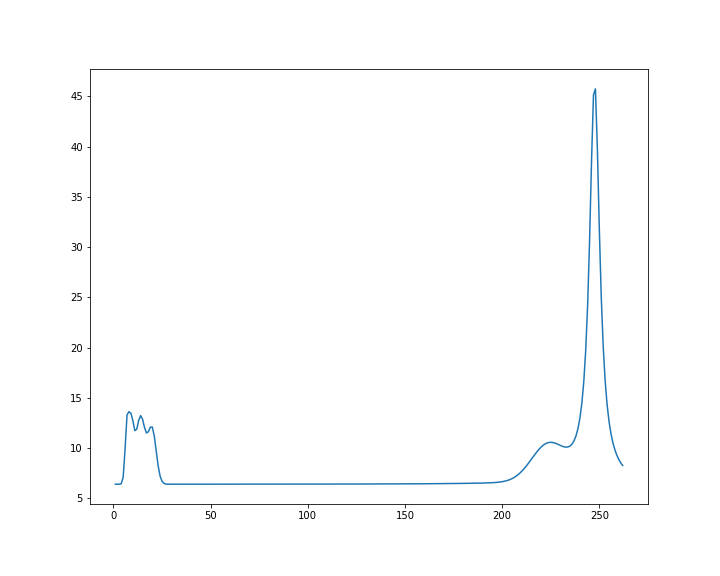

In [493]:
i = 0 
plt.plot(XX[i], YY[i])

In [532]:
bounds

[1,
 20,
 189,
 263,
 387,
 457,
 501,
 541,
 560,
 582,
 627,
 647,
 668,
 682,
 699,
 729,
 765,
 783,
 815,
 834,
 846,
 851,
 869,
 881,
 898,
 903,
 967,
 978,
 1021,
 1038,
 1083,
 1125,
 1157,
 1169,
 1216,
 1278,
 1295,
 1321,
 1348,
 1386,
 1412,
 1456,
 1479,
 1515,
 1539,
 1561,
 1597,
 1623,
 1661,
 1717,
 1740,
 1780,
 1840,
 1868,
 1922,
 1953]

In [544]:
noise = aggregate_uncertainty[:, None].T

In [613]:
stdratio_threshold

7

In [53]:
noise = aggregate_uncertainty[:, None].T
# fsub_stop_2d_1 = pf.curvefit_2d(mean2d(patterns - 0), stdratio_threshold = stdratio_threshold,\
#                         noise_estimate = noise, background = mean2d(background),\
#                         bg_shift_pos = True, fit_sigma = True, reg_scale = 0, reg_edge = 0);
# # TODO is there an off by one errror in the block merging?
# merge adjacent blocks
overlap = 3
#     fsub_stop_2d_3 = pf.refine_2d(mean2d(patterns - 0), pf.merge_fitoutput_blocks(fsub_stop_2d_1_filt, overlap = overlap),\
#                 noise_estimate = aggregate_uncertainty[:, None].T, background = mean2d(background),\
#                 bg_shift_pos = True, fit_sigma = True, reg_scale = 1e-1, reg_edge = 0,
#                 overlap = overlap)


In [87]:
reload(refinement.plotting)
reload(plotting)
reload(refinement)
reload(pf.hitp)
reload(pf)

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig


<module 'xrdc.peak_fitting' from '/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/peak_fitting.py'>

In [ ]:
# fsub_stop_2d_1 = pf.curvefit_2d(mean2d(patterns - 0), stdratio_threshold = stdratio_threshold,\
#                                 noise_estimate = aggregate_uncertainty[:, None].T, background = mean2d(background),\
#                                 bg_shift_pos = True, fit_sigma = True, reg_scale = 0, reg_edge = 0);

In [114]:
len(pf.merge_fitoutput_blocks(fsub_stop_2d_1_filt, overlap = overlap)[2][0])

54

In [76]:
bounds

[1,
 20,
 189,
 263,
 387,
 457,
 501,
 541,
 560,
 582,
 627,
 647,
 668,
 682,
 699,
 729,
 765,
 783,
 815,
 834,
 846,
 851,
 869,
 881,
 898,
 903,
 967,
 978,
 1021,
 1038,
 1083,
 1125,
 1157,
 1169,
 1216,
 1278,
 1295,
 1321,
 1348,
 1386,
 1412,
 1456,
 1479,
 1515,
 1539,
 1561,
 1597,
 1623,
 1661,
 1717,
 1740,
 1780,
 1840,
 1868,
 1922,
 1953]

In [116]:
fsub_stop_2d_3 = pf.merge_fitoutput_blocks(fsub_stop_2d_1_filt, overlap = overlap)
fsub_stop_2d_3 = pf.refine_2d(mean2d(patterns - background),
                              pf.merge_fitoutput_blocks(fsub_stop_2d_1_filt, overlap = overlap),\
            noise_estimate = noise, background = None,\
            bg_shift_pos = True, fit_sigma = True, reg_scale = 0, reg_edge = 0,
            overlap = overlap, bounds = bounds)

[1, 20, 189, 263, 387, 457, 501, 541, 560, 582, 627, 647, 668, 682, 699, 729, 765, 783, 815, 834, 846, 851, 869, 881, 898, 903, 967, 978, 1021, 1038, 1083, 1125, 1157, 1169, 1216, 1278, 1295, 1321, 1348, 1386, 1412, 1456, 1479, 1515, 1539, 1561, 1597, 1623, 1661, 1717, 1740, 1780, 1840, 1868, 1922, 1953]
True
Experimental Info used: 

{'blockBounds_list': [[1, 263], [20, 387], [189, 457], [263, 501], [387, 541], [457, 560], [501, 582], [541, 627], [560, 647], [582, 668], [627, 682], [647, 699], [668, 729], [682, 765], [699, 783], [729, 815], [765, 834], [783, 846], [815, 851], [834, 869], [846, 881], [851, 898], [869, 903], [881, 967], [898, 978], [903, 1021], [967, 1038], [978, 1083], [1021, 1125], [1038, 1157], [1083, 1169], [1125, 1216], [1157, 1278], [1169, 1295], [1216, 1321], [1278, 1348], [1295, 1386], [1321, 1412], [1348, 1456], [1386, 1479], [1412, 1515], [1456, 1539], [1479, 1561], [1515, 1597], [1539, 1623], [1561, 1661], [1597, 1717], [1623, 1740], [1661, 1780], [1717, 1840

[ 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 26

[815 816 817 818 819 820 821 822 823 824 825 826 827 828 829 830 831 832
 833 834 835 836 837 838 839 840 841 842 843 844 845 846 847 848 849 850]
[834 835 836 837 838 839 840 841 842 843 844 845 846 847 848 849 850 851
 852 853 854 855 856 857 858 859 860 861 862 863 864 865 866 867 868]
[846 847 848 849 850 851 852 853 854 855 856 857 858 859 860 861 862 863
 864 865 866 867 868 869 870 871 872 873 874 875 876 877 878 879 880]
[851 852 853 854 855 856 857 858 859 860 861 862 863 864 865 866 867 868
 869 870 871 872 873 874 875 876 877 878 879 880 881 882 883 884 885 886
 887 888 889 890 891 892 893 894 895 896 897]
[869 870 871 872 873 874 875 876 877 878 879 880 881 882 883 884 885 886
 887 888 889 890 891 892 893 894 895 896 897 898 899 900 901 902]
[881 882 883 884 885 886 887 888 889 890 891 892 893 894 895 896 897 898
 899 900 901 902 903 904 905 906 907 908 909 910 911 912 913 914 915 916
 917 918 919 920 921 922 923 924 925 926 927 928 929 930 931 932 933 934
 935 936 937 938 

Optimal parameters not found: The maximum number of function evaluations is exceeded.
peak fitting failed
[1456 1457 1458 1459 1460 1461 1462 1463 1464 1465 1466 1467 1468 1469
 1470 1471 1472 1473 1474 1475 1476 1477 1478 1479 1480 1481 1482 1483
 1484 1485 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495 1496 1497
 1498 1499 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511
 1512 1513 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525
 1526 1527 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538]
[1479 1480 1481 1482 1483 1484 1485 1486 1487 1488 1489 1490 1491 1492
 1493 1494 1495 1496 1497 1498 1499 1500 1501 1502 1503 1504 1505 1506
 1507 1508 1509 1510 1511 1512 1513 1514 1515 1516 1517 1518 1519 1520
 1521 1522 1523 1524 1525 1526 1527 1528 1529 1530 1531 1532 1533 1534
 1535 1536 1537 1538 1539 1540 1541 1542 1543 1544 1545 1546 1547 1548
 1549 1550 1551 1552 1553 1554 1555 1556 1557 1558 1559 1560]
[1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525

In [115]:
[len(elt[0]) for elt in fsub_stop_2d_3]

[2000, 54, 54, 54, 54, 54]

In [117]:
[len(elt[0]) for elt in fsub_stop_2d_3]

[2000, 53, 53, 53, 53, 53]

In [83]:
fsub_stop_2d_1_filt[1]

array([list([{'curve 0': {'FWHM': 5.370015953785824, 'area': 204.58605812295292, 'area_err': 7.032973758924754e-09, 'x0': 7.800278331857943}, 'curve 1': {'FWHM': 10.698890056565272, 'area': 57.24758636055357, 'area_err': 1.2305684203394756e-08, 'x0': 14.071341746747661}, 'curve 2': {'FWHM': 3.116242779975249, 'area': -8.71253986432058, 'area_err': 5.417880730683444e-08, 'x0': 5.445814997084782}}, {'curve 0': {'FWHM': 5.820538599422878, 'area': 886.5329579176433, 'area_err': 9.999045484781208e-07, 'x0': 174.05054023223016}}, {'curve 0': {'FWHM': 6.102755843867333, 'area': 634.4667807393919, 'area_err': 6.872810223192138e-08, 'x0': 247.5510350784644}}, {'curve 0': {'FWHM': 6.440719801803048, 'area': 2920.1262058320294, 'area_err': 1.412933185659937e-06, 'x0': 349.33261221940455}}, {'curve 0': {'FWHM': 9.564318193534865, 'area': 1948.8044337180092, 'area_err': 1.2607289567978519e-05, 'x0': 427.4213409169491}}, {'curve 0': {'FWHM': 10.522916600888559, 'area': 2664.208997849869, 'area_err':

In [108]:
fsub_stop_2d_1_filt[1].shape

(1,)

In [107]:
fsub_stop_2d_3[1].shape

(1,)

In [81]:
mean2d(patterns - 0).shape

(1, 2000)

In [ ]:
mark

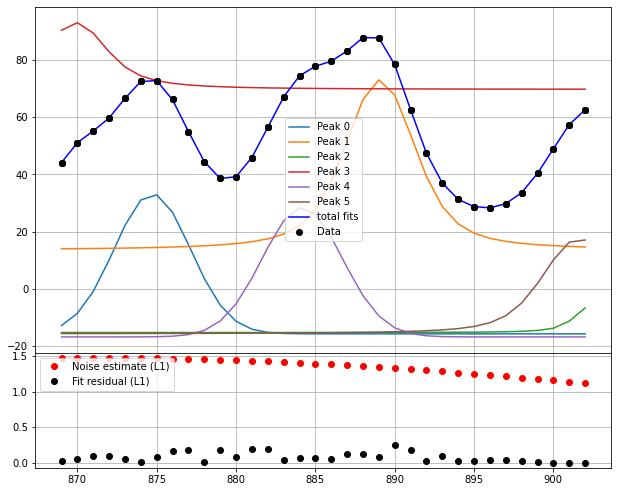

In [92]:
#plot_one_fit(fsub_stop_2d_1, 0, 25);
plotting.plot_one_fit(fsub_stop_2d_3, 0, 22);

In [145]:
fsub_stop_2d_3_cropped = filter_peaks_and_restrict_range(fsub_stop_2d_3, fsub_stop_2d_1, clip_edges=True)
#XX, YY = refinement.get_tails(fsub_stop_2d_3, bounds, 0, 1, background = background)

initial peak count: 209
final peak count: 67


<ipython-input-142-bbdf78e878e1>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(misc.deepmap(arr, lambda arr: arr[offset:-offset], 1))


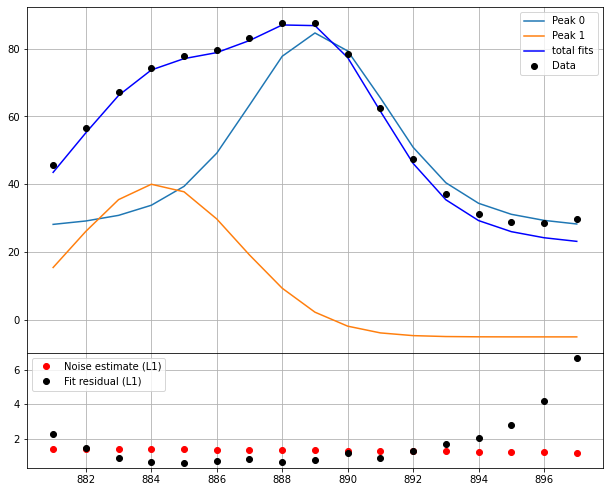

In [146]:
plotting.plot_one_fit(fsub_stop_2d_3_cropped, 0, 22);

In [134]:
[len(elt[0]) for elt in fsub_stop_2d_3_cropped]

[2000, 53, 55, 55, 55, 53]

In [147]:
reload(plotting)

<module 'xrdc.plotting' from '/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/plotting.py'>

In [149]:
%matplotlib notebook

<IPython.core.display.Javascript object>


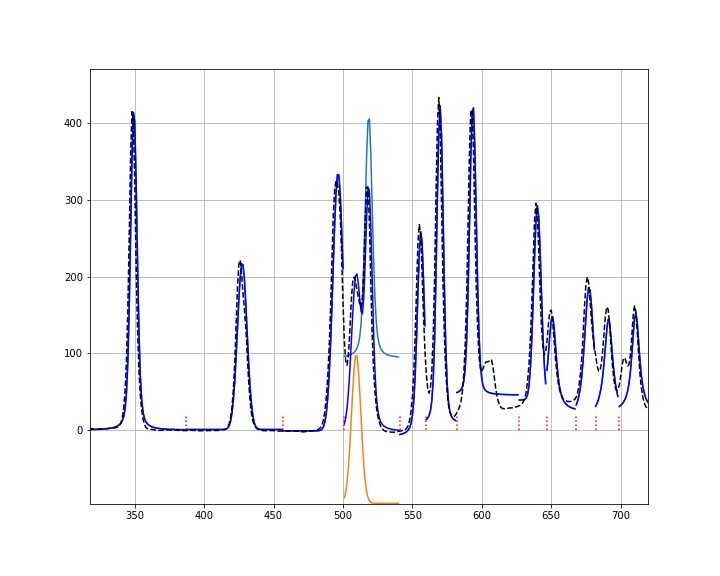

In [151]:
plotting.plot_all_fits(fsub_stop_2d_3_cropped, 0);
plt.plot(mean2d(patterns - background)[0], 'k--')

In [1050]:
reload(pf)

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig


<module 'xrdc.peak_fitting' from '/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/peak_fitting.py'>

In [730]:
# fsub_stop_2d_3 = pf.merge_fitoutput_blocks(fsub_stop_2d_1_filt, overlap = overlap, params_only=True)

In [713]:
fsub_stop_2d_3[2][0][0]

array([0.13671952, 0.13673874, 0.13677829, 0.13684031, 0.13692807,
       0.13704611, 0.13719997, 0.13739616, 0.13764176, 0.13794534,
       0.13831555, 0.13876162, 0.13929323, 0.13992061, 0.14065426,
       0.1415045 , 0.14248175, 0.14359624, 0.14485779])

In [734]:
fsub_stop_2d_3_filt = fsub_stop_2d_3
i = 0

# remove stray peaks
fsub_stop_2d_3_filt = refinement.filter_peaks(fsub_stop_2d_3_filt, bounds, i, boundoffset = 1, buffer = 0.5)
#fsub_stop_2d_3_filt = refinement.insert_background(fsub_stop_2d_3_filt, [YY])

fsub_stop_2d_3_filt = pf.merge_fitoutput_blocks(fsub_stop_2d_3_filt, overlap = overlap, lists_only=True)

initial peak count: 263
final peak count: 87


In [725]:
fsub_stop_2d_3[3][0][0]

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [143]:
reload(plotting)
reload(refinement)
reload(pf)

/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/dataproc/dataproc/workflows/basicConfig


<module 'xrdc.peak_fitting' from '/home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/peak_fitting.py'>

In [144]:
XX, YY = refinement.get_tails(fsub_stop_2d_3, bounds, 0, 1, background = background)



fsub_stop_2d_3_filt_cropped = restrict_range(fsub_stop_2d_3_filt, fsub_stop_2d_1)

initial peak count: 209
final peak count: 142
-1.602333888274591
-0.8041093317974823
0.010171610557529576
0.8168773592367984
-0.9858496993062076
-1.8182514138725665
-8.33147916026936
7.881402724440335
45.6380943318141
39.24284157521804
24.061556340625764
13.297552514733809
12.914614076232759
23.47425049420396
17.71492694344471
-7.207237029183105
-12.284517729758363
-11.68063745519231
-4.509107544251915
2.030608277286589
13.976753087602972
37.890915111247196
20.061216559868562
-13.060287552236725
-13.991654515174876
-23.469538410214767
-5.783052710829473
9.698991326853132
5.701238216909566
4.813034455490836
-9.6118385863208
-0.17779335393707996
-1.7068455025266926
-2.120679192416686
-3.6675195010095365
-1.4601277232894994
-4.698356912597788
-4.2363057217202025
6.418621790650113
1.4570853753801014
5.682999420306183
-7.467531402141376
-1.85642591882036
-2.4145022290480886
0.02493046164016466
-0.08574192260534375
-6.633532272807579
-4.479467632173602
-2.9744670159511917
-1.4983229453888178

NameError: name 'fsub_stop_2d_3_filt' is not defined

> <ipython-input-144-12de9c692ffe>(5)<module>()
      1 XX, YY = refinement.get_tails(fsub_stop_2d_3, bounds, 0, 1, background = background)
      2 
      3 
      4 
----> 5 fsub_stop_2d_3_filt_cropped = restrict_range(fsub_stop_2d_3_filt, fsub_stop_2d_1)

ipdb> c


In [142]:
def restrict_range(fitlists_merged, fitlists_single, offset = 1, clip = True):
    suby, _, noiseListNew, xListNew, yListNew, _ = fitlists_single
    _, summaryList, _, _, _, curve_paramsList = fitlists_merged
    
    def take(arr):
        if clip:
            return np.array(misc.deepmap(arr, lambda arr: arr[offset:-offset], 1))
        else:
            return np.array(arr)#misc.deepmap(arr, lambda arr: arr, 1))
    return suby, summaryList, take(noiseListNew), take(xListNew), take(yListNew), curve_paramsList


def filter_peaks_and_restrict_range(fitlists_merged, fitlists_single, offset = 1, clip_edges = True):
    filt = refinement.filter_peaks(fitlists_merged, bounds, i, boundoffset = 1, buffer = 0.5, clip_edges = clip_edges)
    return restrict_range(filt, fitlists_single, clip = clip_edges)

In [742]:
# # Refine again, since peaks may have been removed. May have to do this several times to converge
# fsub_stop_2d_3_filt = pf.refine_2d(mean2d(patterns - 0), fsub_stop_2d_3_filt,\
#             noise_estimate = noise, background = np.array([YY]),\
#             bg_shift_pos = True, fit_sigma = True, reg_scale = 0, reg_edge = 0,
#             overlap = overlap)

numBlocks: 470, dataPts/Block: 4.25531914893617
[   0.   20.  189.  263.  387.  457.  501.  541.  560.  582.  627.  647.
  668.  682.  699.  729.  765.  783.  815.  834.  846.  851.  869.  881.
  898.  903.  967.  978. 1021. 1038. 1083. 1125. 1157. 1169. 1216. 1278.
 1295. 1321. 1348. 1386. 1412. 1456. 1479. 1515. 1539. 1561. 1597. 1623.
 1661. 1717. 1740. 1780. 1840. 1868. 1922. 1953. 1999.]
True
Experimental Info used: 

{'blockBounds_list': [[0.0, 263.0], [20.0, 387.0], [189.0, 457.0], [263.0, 501.0], [387.0, 541.0], [457.0, 560.0], [501.0, 582.0], [541.0, 627.0], [560.0, 647.0], [582.0, 668.0], [627.0, 682.0], [647.0, 699.0], [668.0, 729.0], [682.0, 765.0], [699.0, 783.0], [729.0, 815.0], [765.0, 834.0], [783.0, 846.0], [815.0, 851.0], [834.0, 869.0], [846.0, 881.0], [851.0, 898.0], [869.0, 903.0], [881.0, 967.0], [898.0, 978.0], [903.0, 1021.0], [967.0, 1038.0], [978.0, 1083.0], [1021.0, 1125.0], [1038.0, 1157.0], [1083.0, 1169.0], [1125.0, 1216.0], [1157.0, 1278.0], [1169.0, 1295

<ipython-input-742-5911ee45342f>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  noise_estimate = noise, background = np.array([YY]),\


ValueError: operands could not be broadcast together with shapes (262,) (19,) 

> /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/peak_fitting.py(128)workflow()
    126         selector = np.where((subx >= leftBnd) & (subx < rightBnd))
    127         xList.append(subx[selector])
--> 128         yList.append(adj_suby(suby[selector] - background[i]))
    129         if noise_estimate is not None:
    130             noiseList.append(noise_estimate[selector] + 1e-9)

ipdb> c


In [572]:
%matplotlib inline

In [850]:
background

array([[146.03116624, 146.03270469, 146.03579051, ..., 205.33007809,
        205.34128027, 205.34688417],
       [146.02169235, 146.02309517, 146.02590918, ..., 205.45851416,
        205.46852876, 205.47353652],
       [146.01604605, 146.01739502, 146.02010143, ..., 205.61380059,
        205.62205286, 205.62617665],
       ...,
       [146.05248964, 146.05433471, 146.05803514, ..., 205.99764526,
        205.9980108 , 205.99819319],
       [146.05248964, 146.05433471, 146.05803514, ..., 205.99764526,
        205.9980108 , 205.99819319],
       [146.06452745, 146.066498  , 146.0704493 , ..., 205.99764526,
        205.9980108 , 205.99819319]])

In [995]:
# Refine again, since peaks may have been removed. May have to do this several times to converge
fsub_stop_2d_3_filt_cropped_refined = pf.refine_2d(mean2d(patterns - 0), fsub_stop_2d_3_filt_cropped,\
            noise_estimate = noise, background = np.array([YY]),\
            bg_shift_pos = True, fit_sigma = True, reg_scale = 1e-2, reg_edge = 0,
            overlap = 1, bounds = bounds[1:])

<ipython-input-995-1bc40dd5d0e0>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  noise_estimate = noise, background = np.array([YY]),\


[20, 189, 263, 387, 457, 501, 541, 560, 582, 627, 647, 668, 682, 699, 729, 765, 783, 815, 834, 846, 851, 869, 881, 898, 903, 967, 978, 1021, 1038, 1083, 1125, 1157, 1169, 1216, 1278, 1295, 1321, 1348, 1386, 1412, 1456, 1479, 1515, 1539, 1561, 1597, 1623, 1661, 1717, 1740, 1780, 1840, 1868, 1922, 1953]
True
Experimental Info used: 

{'blockBounds_list': [[20, 189], [189, 263], [263, 387], [387, 457], [457, 501], [501, 541], [541, 560], [560, 582], [582, 627], [627, 647], [647, 668], [668, 682], [682, 699], [699, 729], [729, 765], [765, 783], [783, 815], [815, 834], [834, 846], [846, 851], [851, 869], [869, 881], [881, 898], [898, 903], [903, 967], [967, 978], [978, 1021], [1021, 1038], [1038, 1083], [1083, 1125], [1125, 1157], [1157, 1169], [1169, 1216], [1216, 1278], [1278, 1295], [1295, 1321], [1321, 1348], [1348, 1386], [1386, 1412], [1412, 1456], [1456, 1479], [1479, 1515], [1515, 1539], [1539, 1561], [1561, 1597], [1597, 1623], [1623, 1661], [1661, 1717], [1717, 1740], [1740, 1780]

[457 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474
 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492
 493 494 495 496 497 498 499 500]
[501 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518
 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536
 537 538 539 540]
[541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558
 559]
[560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575 576 577
 578 579 580 581]
[582 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597 598 599
 600 601 602 603 604 605 606 607 608 609 610 611 612 613 614 615 616 617
 618 619 620 621 622 623 624 625 626]
[627 628 629 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644
 645 646]
[647 648 649 650 651 652 653 654 655 656 657 658 659 660 661 662 663 664
 665 666 667]
[668 669 670 671 672 673 674 675 676 677 678 679 680 681]
[682 683 684 685 686 687 688 689 690 691 692 693 694 695 696 697 698]
[699

/home/ollie/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[903 904 905 906 907 908 909 910 911 912 913 914 915 916 917 918 919 920
 921 922 923 924 925 926 927 928 929 930 931 932 933 934 935 936 937 938
 939 940 941 942 943 944 945 946 947 948 949 950 951 952 953 954 955 956
 957 958 959 960 961 962 963 964 965 966]
[967 968 969 970 971 972 973 974 975 976 977]
[ 978  979  980  981  982  983  984  985  986  987  988  989  990  991
  992  993  994  995  996  997  998  999 1000 1001 1002 1003 1004 1005
 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017 1018 1019
 1020]
[1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031 1032 1033 1034
 1035 1036 1037]
[1038 1039 1040 1041 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051
 1052 1053 1054 1055 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065
 1066 1067 1068 1069 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079
 1080 1081 1082]
[1083 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096
 1097 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110
 1111 1112 11

In [919]:
YY

array([167.44520796, 163.61168932, 161.69278523, 160.73290086,
       160.23969158, 159.98176281, 159.84375652, 159.76764314,
       159.72477326, 159.70118559, 159.68997203, 159.68753408,
       159.69185007, 159.7016961 , 159.71628913, 159.73511158,
       159.75781622, 159.78416941, 159.81401489, 159.84724944,
       159.883806  , 159.92364153, 159.96672812, 160.01304621,
       160.0625794 , 160.11531034, 160.17121742, 160.23027212,
       160.29243678, 160.35766519, 160.42589695, 160.49705687,
       160.57105702, 160.64779716, 160.72714975, 160.80898289,
       160.89314822, 160.97948245, 161.06781703, 161.15795338,
       161.24968507, 161.34279727, 161.43706433, 161.53225128,
       161.62811595, 161.72440891, 161.82088206, 161.91728252,
       162.01335733, 162.10885542, 162.2035295 , 162.29713796,
       162.38944678, 162.48023131, 162.56927799, 162.65638601,
       162.7413688 , 162.82405545, 162.90429194, 162.98194223,
       163.05688924, 163.12903562, 163.19830433, 163.26

<IPython.core.display.Javascript object>


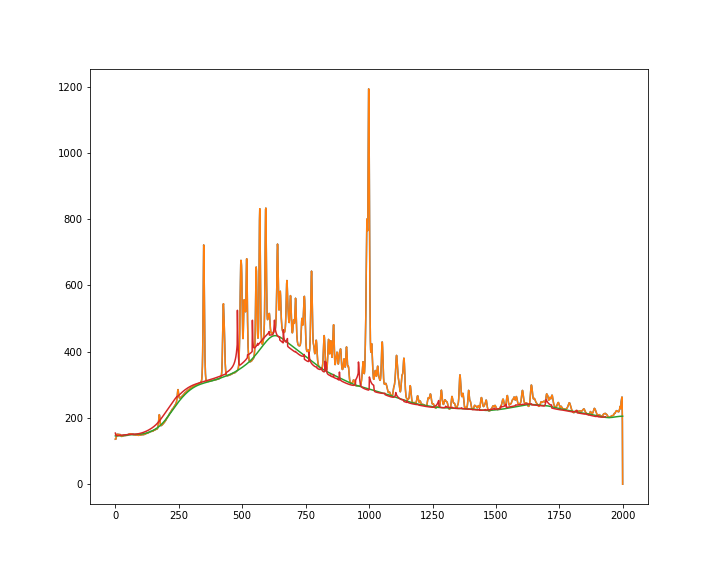

In [996]:
plt.plot(fsub_stop_2d_3_filt_cropped_refined[0][0])
plt.plot(mean2d(patterns - 0)[0])
plt.plot(background[0])
plt.plot(np.hstack(YY))

<IPython.core.display.Javascript object>


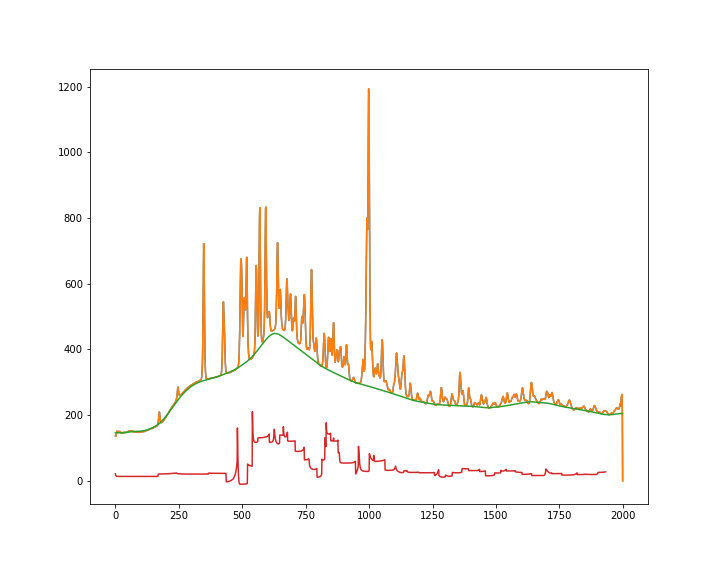

In [930]:
plt.plot(fsub_stop_2d_3_filt_cropped_refined[0][0])
plt.plot(mean2d(patterns - 0)[0])
plt.plot(background[0])
plt.plot(np.hstack(YY))

In [931]:
background.mean()

269.1412887050253

In [761]:
YY[0].shape

(19,)

In [558]:
np.array(YY)

<ipython-input-558-6cabd430c9aa>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(YY).shape


(54,)

In [603]:
%matplotlib notebook

<IPython.core.display.Javascript object>


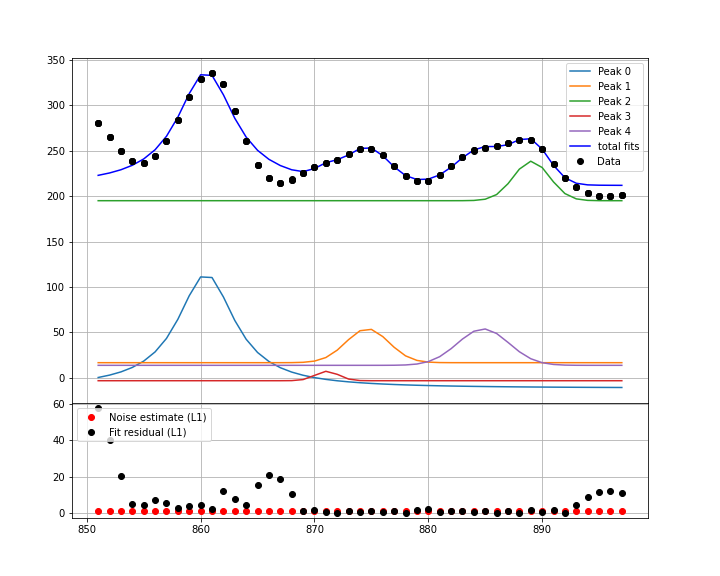

In [1000]:
plotting.plot_one_fit(fsub_stop_2d_3, 0, 21);

encountered empty peak set. skipping filtering at location 0
encountered empty peak set. skipping filtering at location 1
encountered empty peak set. skipping filtering at location 48
encountered empty peak set. skipping filtering at location 51
initial peak count: 212
final peak count: 80
initial peak count: 212
final peak count: 146
142.15071990762743
142.2049685280764
167.88607576530117
287.2832104204594
315.2773629722762
332.512165332015
366.61525113881646
398.66252430862363
454.76743701386135
464.36499867686314
451.14827395634654
427.40863663398096
402.7965798490292
398.38003246161384
396.49887064588006
341.79796799876567
340.770082040613
342.90539967008044
339.3476226939353
342.95579627221144
341.39029635679356
357.50771280718175
334.8705556449207
288.4047960065458
290.08042415314486
290.5981771017134
290.82106254892733
280.437663466143
275.2942037249556
263.6768070330173
256.73412497563595
241.70957711999128
232.0588926717277
231.45557880010597
232.74802360173143
230.04947908470

<ipython-input-60-9be47e5589f5>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(misc.deepmap(arr, lambda arr: arr[offset:-offset], 1))


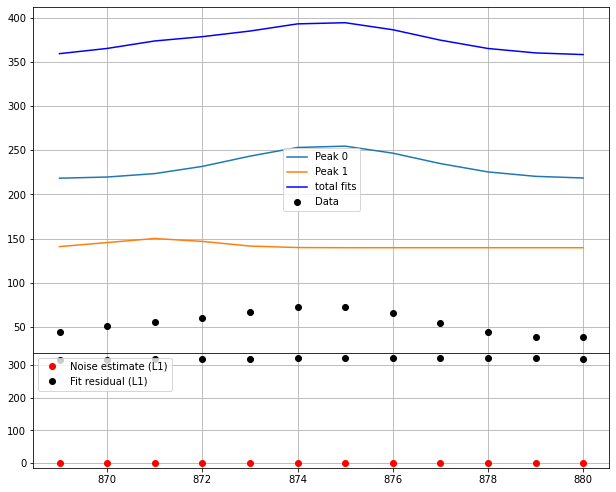

In [63]:
fsub_stop_2d_3_cropped = filter_peaks_and_restrict_range(fsub_stop_2d_3, fsub_stop_2d_1)
XX, YY = refinement.get_tails(fsub_stop_2d_3, bounds, 0, 1, background = background)

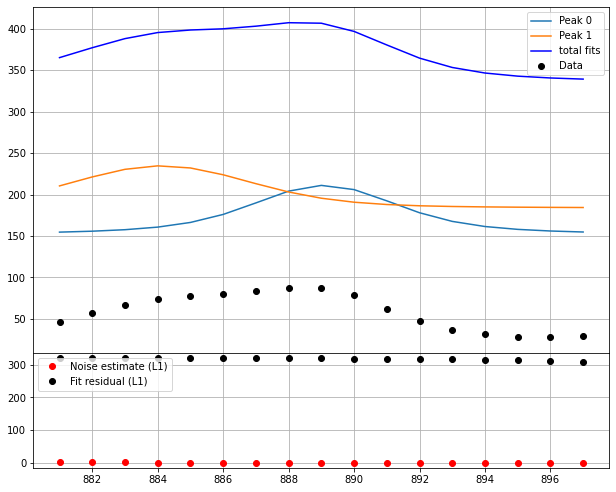

In [68]:
plotting.plot_one_fit(fsub_stop_2d_3_cropped, 0, 22);

encountered empty peak set. skipping filtering at location 48
initial peak count: 263
final peak count: 88


<ipython-input-994-d1e172c822fa>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(misc.deepmap(arr, lambda arr: arr[offset:-offset], 1))


<IPython.core.display.Javascript object>


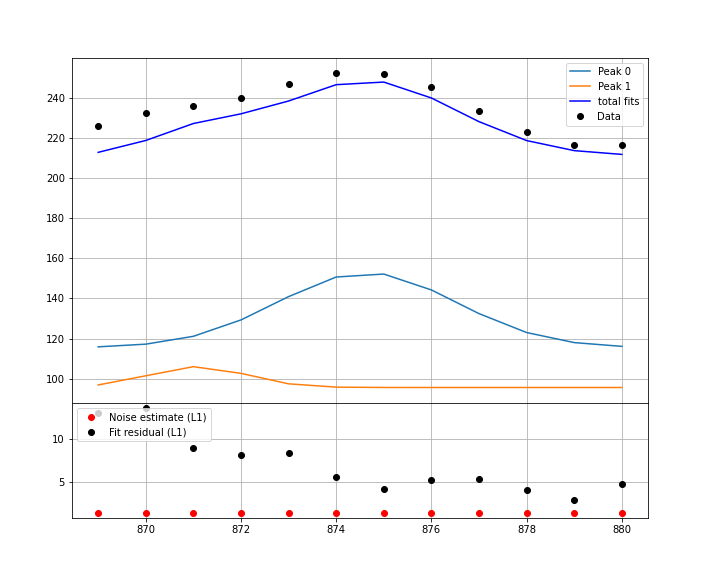

In [1006]:
fsub_stop_2d_3_cropped = filter_peaks_and_restrict_range(fsub_stop_2d_3, fsub_stop_2d_1)
XX, YY = refinement.get_tails(fsub_stop_2d_3, bounds, 0, 1, background = background)

plotting.plot_one_fit(fsub_stop_2d_3_cropped, 0, 21);

In [1027]:
len(fsub_stop_2d_3_cropped[2][0])

54

In [1028]:
bounds

[1,
 20,
 189,
 263,
 387,
 457,
 501,
 541,
 560,
 582,
 627,
 647,
 668,
 682,
 699,
 729,
 765,
 783,
 815,
 834,
 846,
 851,
 869,
 881,
 898,
 903,
 967,
 978,
 1021,
 1038,
 1083,
 1125,
 1157,
 1169,
 1216,
 1278,
 1295,
 1321,
 1348,
 1386,
 1412,
 1456,
 1479,
 1515,
 1539,
 1561,
 1597,
 1623,
 1661,
 1717,
 1740,
 1780,
 1840,
 1868,
 1922,
 1953]

mark

initial peak count: 263
final peak count: 83
initial peak count: 263
final peak count: 175
7.209069107364941
3.371959679347505
2.132213192548221
0.16022736881144795
1.0741028823293988
0.9221803585822599
-27.010463190636088
9.476972891917967
45.637977943549714
39.243470933021925
24.086689119016746
13.30049541209144
20.078706184482385
26.150540934618554
22.728712662595157
-2.5136284437251746
-5.362146951725165
-10.131997370491385
-28.91320232404906
2.645038641389025
38.959963064121986
37.88795952738438
23.520671895471978
3.417290973587683
3.4372163722304023
0.652102151919479
-7.242192708643984
8.932682922362822
6.3008623132193655
7.514965514331463
-5.50946726009089
1.5527608394598698
1.236521201882583
0.7530270501592344
1.3310199328604952
-8.999478019472402
-1.4313024248581208
-2.878284659968436
6.53103986121684
5.8863202660334695
4.304288261152619
-3.331794307624136
-0.9235982411439077
-1.2809487723170534
-0.0030996322271272803
10.222789367252371
3.885521813882651
16.188299680659153
6.0

<ipython-input-994-d1e172c822fa>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(misc.deepmap(arr, lambda arr: arr[offset:-offset], 1))


<IPython.core.display.Javascript object>


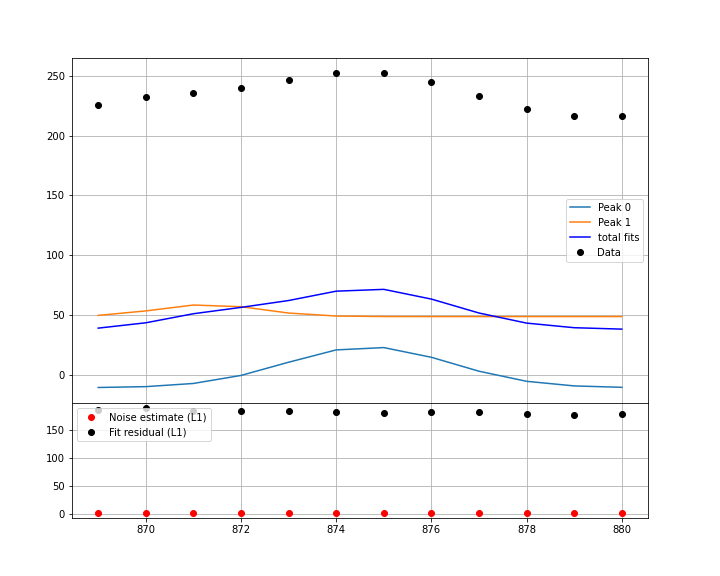

In [1051]:
reload(refinement)

fsub_stop_2d_3_cropped = filter_peaks_and_restrict_range(fsub_stop_2d_3, fsub_stop_2d_1);
XX, YY = refinement.get_tails(fsub_stop_2d_3, bounds[1:], 0, boundoffset = 1, background = background);

plotting.plot_one_fit(fsub_stop_2d_3_cropped, 0, 21);

/home/ollie/anaconda3/lib/python3.8/site-packages/numpy/core/shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


<IPython.core.display.Javascript object>


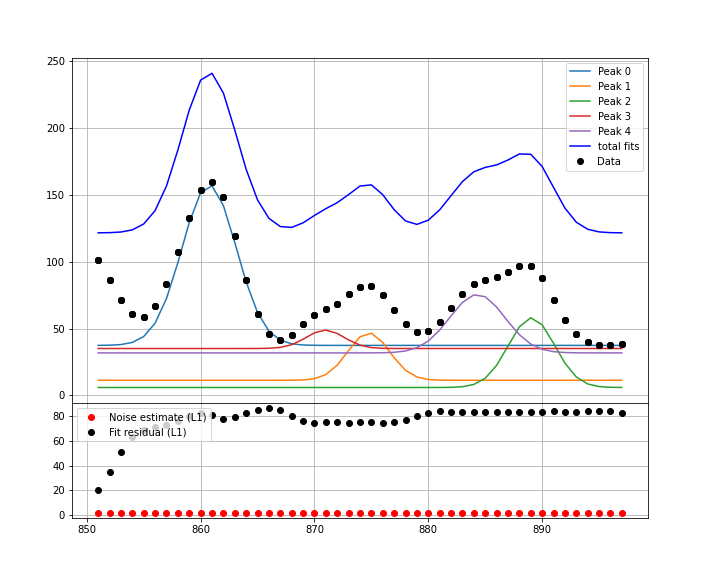

([array([101.22739512,  86.69148803,  71.22269087,  60.89727462,
          59.03305218,  66.80925164,  83.68014623, 107.35904554,
         133.07618553, 153.38297199, 159.77226019, 148.60033606,
         119.01556362,  86.16716068,  60.84141837,  45.95335083,
          41.49691248,  45.46132905, 101.22739512,  86.69148803,
          71.22269087,  60.89727462,  59.03305218,  66.80925164,
          83.68014623, 107.35904554, 133.07618553, 153.38297199,
         159.77226019, 148.60033606, 119.01556362,  86.16716068,
          60.84141837,  45.95335083,  41.49691248,  45.46132905,
          53.20403428,  60.05282231,  64.30079669,  68.6574466 ,
          75.65207387,  81.49222165,  81.70714489,  75.23729479,
          63.85371636,  53.51044171,  47.79276119,  48.15836137,
         101.22739512,  86.69148803,  71.22269087,  60.89727462,
          59.03305218,  66.80925164,  83.68014623, 107.35904554,
         133.07618553, 153.38297199, 159.77226019, 148.60033606,
         119.01556362,  8

In [1052]:
plotting.plot_one_fit(pf.merge_fitoutput_blocks(fsub_stop_2d_1_filt, overlap = overlap), 0, 21)

In [ ]:
fsub_stop_2d_3_cropped = filter_peaks_and_restrict_range(fsub_stop_2d_3, fsub_stop_2d_1)
XX, YY = refinement.get_tails(fsub_stop_2d_3, bounds, 0, 1, background = background)

plotting.plot_one_fit(fsub_stop_2d_3_cropped, 0, 21);

<IPython.core.display.Javascript object>


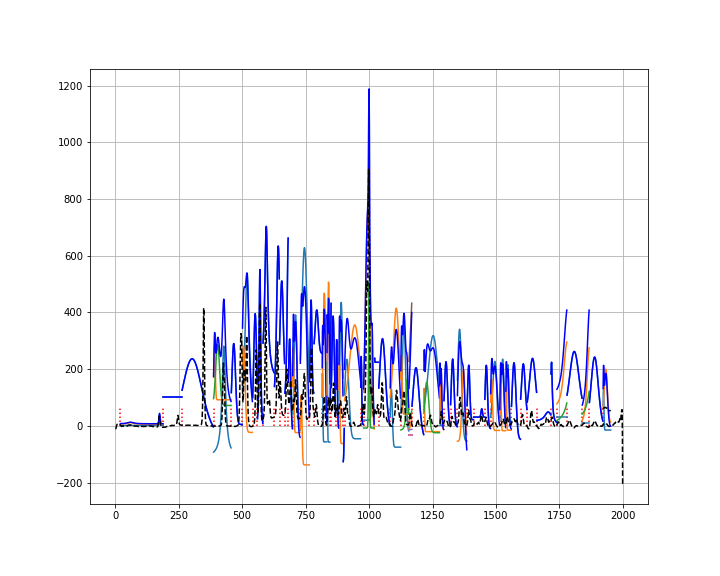

In [1047]:
plotting.plot_all_fits(fsub_stop_2d_3_cropped, 0);
plt.plot(mean2d(patterns - background)[0], 'k--')
#plt.plot(XX, YY, 'o')

<IPython.core.display.Javascript object>


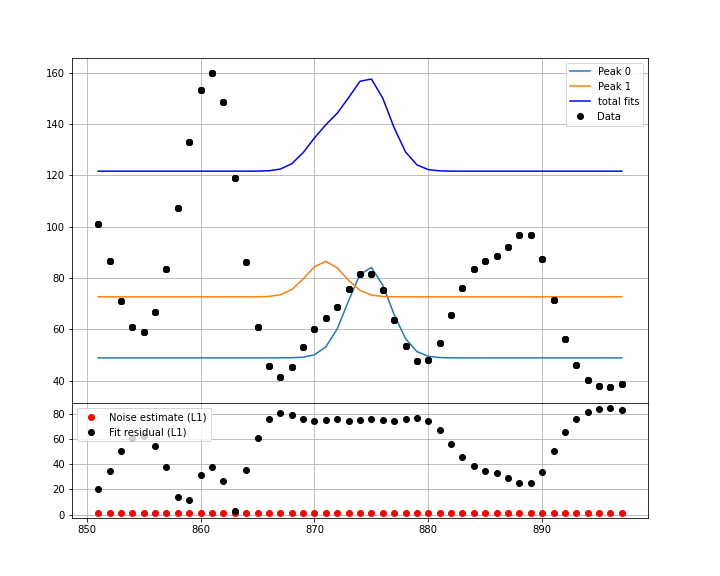

In [884]:
plotting.plot_one_fit(fsub_stop_2d_3_filt, 0, 21);

<IPython.core.display.Javascript object>


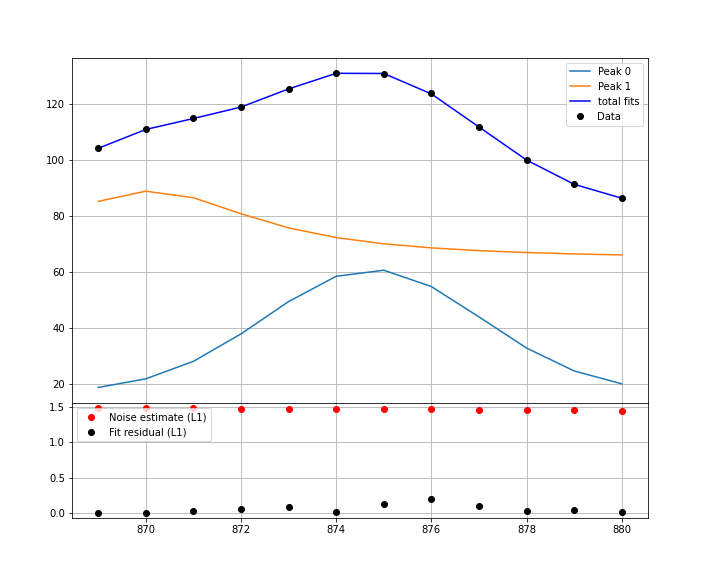

In [890]:
plotting.plot_one_fit(fsub_stop_2d_3_filt_cropped_refined, 0, 21);

<IPython.core.display.Javascript object>


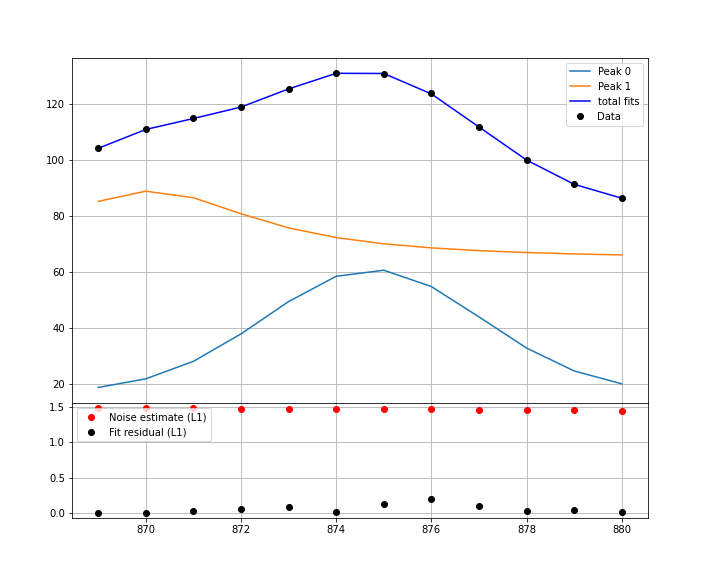

In [904]:
plotting.plot_one_fit(fsub_stop_2d_3_filt_cropped_refined, 0, 21);

<IPython.core.display.Javascript object>


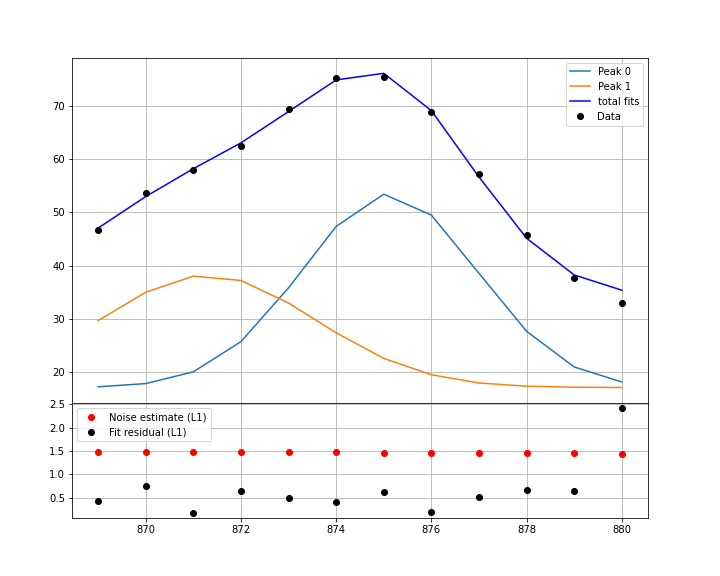

In [985]:
plotting.plot_one_fit(fsub_stop_2d_3_filt_cropped_refined, 0, 21);

In [888]:
%matplotlib notebook

<IPython.core.display.Javascript object>


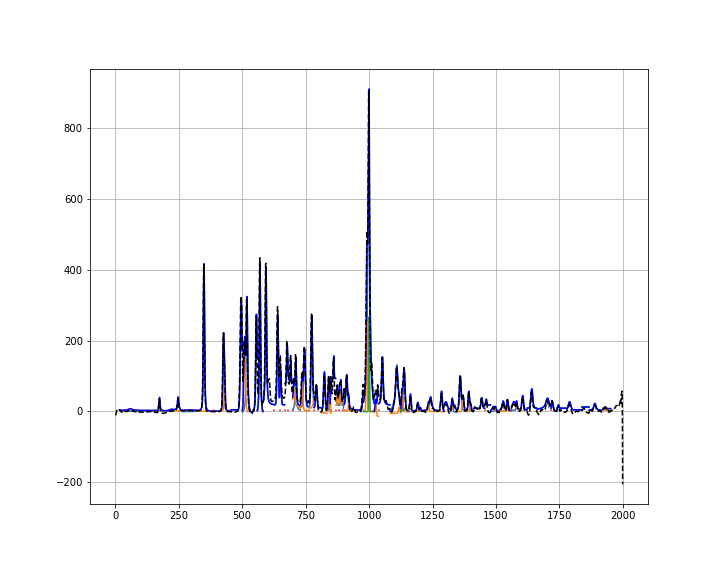

In [997]:
plotting.plot_all_fits(fsub_stop_2d_3_filt_cropped_refined, 0);
plt.plot(mean2d(patterns - background)[0], 'k--')
#plt.plot(XX, YY, 'o')

<IPython.core.display.Javascript object>


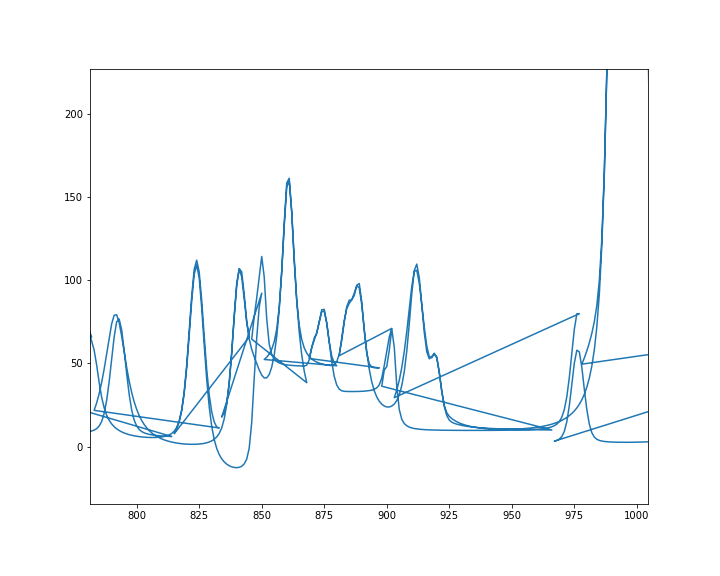

In [458]:
plt.plot(XX, YY)

In [427]:
XX.shape

(16462,)

In [360]:
%matplotlib notebook

<IPython.core.display.Javascript object>


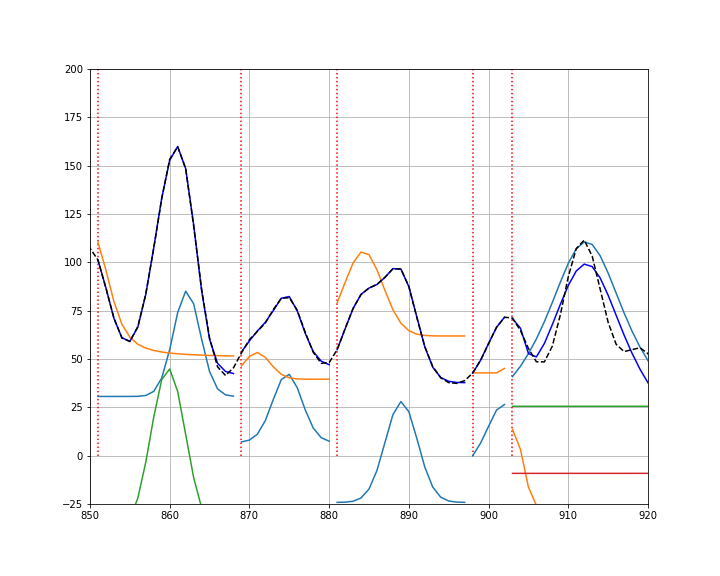

(-25.0, 200.0)

In [390]:
plotting.plot_all_fits(tmp, 0);
plt.xlim(850, 920)
plt.ylim(-25, 200)

<IPython.core.display.Javascript object>


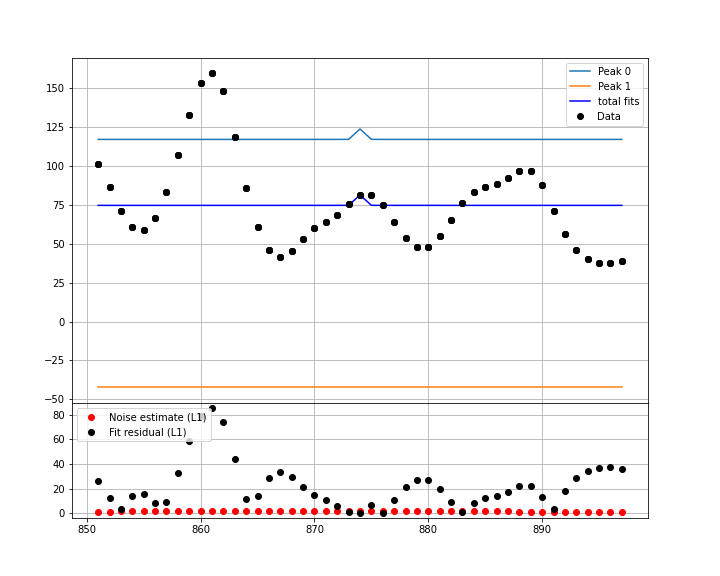

In [375]:
plotting.plot_one_fit(fsub_stop_2d_3_filt, 0, 21);

In [377]:
fsub_stop_2d_3[2][0][21]

array([1.34126406, 1.3540711 , 1.3663856 , 1.37817465, 1.38940845,
       1.40005855, 1.41009885, 1.41950335, 1.4282479 , 1.43631155,
       1.44367526, 1.45032259, 1.45624024, 1.46141903, 1.46585239,
       1.46953518, 1.47246235, 1.47462984, 1.47603517, 1.47667682,
       1.4765542 , 1.47566778, 1.47401896, 1.47160973, 1.46844215,
       1.46451818, 1.45983931, 1.45440697, 1.44822277, 1.4412887 ,
       1.43360739, 1.42518201, 1.41601648, 1.4061155 , 1.39548467,
       1.38413115, 1.3720631 , 1.35929036, 1.34582456, 1.3316793 ,
       1.31687112, 1.30141905, 1.28534362, 1.26866843, 1.25141907,
       1.23362266, 1.21530743])

In [367]:
fsub_stop_2d_3_filt[-1][0][21]

{'curve 0': {'x0': 874.6317886729829,
  'y0': 29.851679331625604,
  'I': 9.91571380631911,
  'alpha': 0.3502515793194474,
  'gamma': 9.141736076070869e-14,
  'leftBnd': [868.45, 20.27791271466066, 0, 0, 0],
  'rightBnd': [880.55, inf, inf, 2.75, 2.75]},
 'curve 1': {'x0': 873.9115158687838,
  'y0': 45.65639210336727,
  'I': 1.9114638217263253,
  'alpha': 0.07554497797421711,
  'gamma': 8.205544380044625e-07,
  'leftBnd': [868.45, 20.27791271466066, 0, 0, 0],
  'rightBnd': [880.55, inf, inf, 2.75, 2.75]}}

In [311]:
fitlists_final[3][0]

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 array([ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
         33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
         46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
         59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
         72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
         85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
        111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
        124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136,
        137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
        150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
        163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
        176, 177, 178, 179

In [257]:
fsub_stop_2d_3_filt

In [ ]:
fsub_stop_2d_3_filt

In [258]:
arrays_unmerged, paramsLists_unmerged, noiselists_unmerged, xLists_unmerged, yLists_unmerged, curveparams_unmerged =\
    fsub_stop_2d_1_filt

# _, paramsLists_filt, noiseList_final, xLists_final, yLists_final, curveparams_filt\
#     = fsub_stop_2d_3_filt

# _, paramsLists_filt, noiseList_final, xLists_final, yLists_final, curveparams_filt\
#     = fsub_stop_2d_3_filt



# # Recombine peak fit parameters from the merged blocks with original single-block parameters
# fitlists_final = arrays_unmerged, paramsLists_filt,\
#     misc.deepmap(noiselists_unmerged, lambda lst: lst[:-2], 1),\
#     misc.deepmap(xLists_unmerged, lambda lst: lst[:-2], 1),\
#     misc.deepmap(yLists_unmerged, lambda lst: lst[:-2], 1), curveparams_filt

# Recombine peak fit parameters from the merged blocks with original single-block parameters
fitlists_final = restrict_range(bounds, fsub_stop_2d_3_filt)

# arrays_unmerged, paramsLists_filt, noiseList_final, xLists_final,\
#     yLists_final, curveparams_filt

In [64]:
def pad_fits(fits1, fits2, size = 1):
    def _padlist(lst1, lst2):
        return [lst2[:size]] + lst1 + [lst2[-size:]]
    res = [fits1[0]]
    for lst1, lst2 in zip(fits1[1:], fits2[1:]):
        res.append(_padlist(lst1, lst2))
    return res

In [167]:
# arrays_unmerged, paramsLists_unmerged, noiselists_unmerged, xLists_unmerged, yLists_unmerged, curveparams_unmerged =\
#     fsub_stop_2d_1_filt

# _, paramsLists_filt, _, _, _, curveparams_filt\
#     = fsub_stop_2d_3_filt



# # Recombine peak fit parameters from the merged blocks with original single-block parameters
# fitlists_final = arrays_unmerged, paramsLists_filt,\
#     misc.deepmap(noiselists_unmerged, lambda lst: lst[:-2], 1),\
#     misc.deepmap(xLists_unmerged, lambda lst: lst[:-2], 1),\
#     misc.deepmap(yLists_unmerged, lambda lst: lst[:-2], 1), curveparams_filt

# # # Recombine peak fit parameters from the merged blocks with original single-block parameters
# # fitlists_final = arrays_unmerged, paramsLists_filt,\
# #     misc.deepmap(noiselists_unmerged, lambda lst: lst[1:-1], 1),\
# #     misc.deepmap(xLists_unmerged, lambda lst: lst[1:-1], 1),\
# #     misc.deepmap(yLists_unmerged, lambda lst: lst[1:-1], 1), curveparams_filt


In [65]:
# fitlists_final = pad_fits(fitlists_final, fsub_stop_2d_1_filt)

<IPython.core.display.Javascript object>


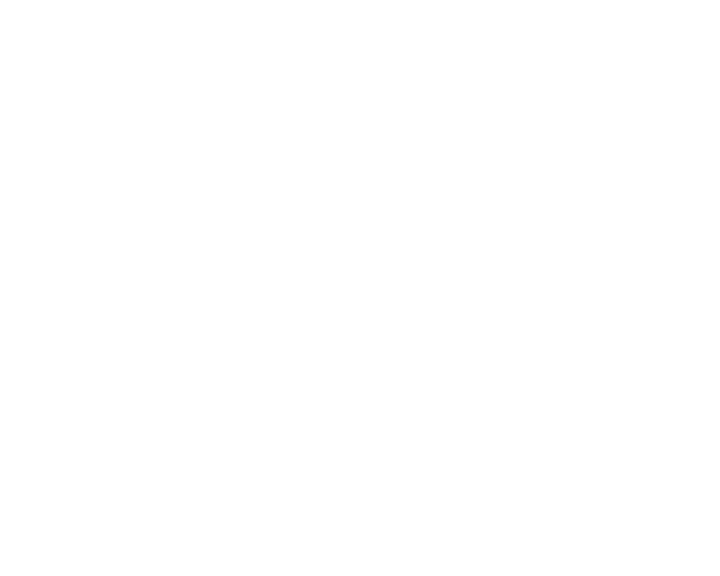

TypeError: bad operand type for abs(): 'NoneType'

> /home/ollie/anaconda3/lib/python3.8/site-packages/xrdc-1.0-py3.8.egg/xrdc/plotting.py(59)plot_one_fit()
     57     #Residual plot
     58     frame2=fig1.add_axes((.1,.1,.8,.2))
---> 59     plt.plot(xLists[i][j], np.abs(noiselists[i][j]), 'or', label = 'Noise estimate (L1)')
     60     plt.plot(xLists[i][j], 
     61         np.abs(yLists[i][j] - ys[-1]), 'ok', label = 'Fit residual (L1)')

ipdb> c


In [339]:
plotting.plot_one_fit(fitlists_final, 0, 23);

In [95]:
%matplotlib notebook

In [53]:
%pdb

Automatic pdb calling has been turned ON


In [61]:
noiselists_unmerged[0]

[array([0.13671952, 0.13673874, 0.13677829, 0.13684031, 0.13692807,
        0.13704611, 0.13719997, 0.13739616, 0.13764176, 0.13794534,
        0.13831555, 0.13876162, 0.13929323, 0.13992061, 0.14065426,
        0.1415045 , 0.14248175, 0.14359624, 0.14485779]),
 array([0.14627581, 0.14785905, 0.14961554, 0.15155233, 0.15367566,
        0.15599059, 0.15850085, 0.16120841, 0.16411409, 0.16721753,
        0.17051649, 0.17400738, 0.17768472, 0.18154146, 0.185569  ,
        0.18975702, 0.19409403, 0.19856639, 0.20315827, 0.20785366,
        0.21263478, 0.21748296, 0.22237859, 0.2273011 , 0.23222916,
        0.23714089, 0.24201409, 0.2468263 , 0.2515552 , 0.25617865,
        0.26067457, 0.26502171, 0.2691991 , 0.27318692, 0.27696644,
        0.28052013, 0.28383165, 0.28688611, 0.28966994, 0.29217117,
        0.29437952, 0.29628674, 0.29788628, 0.29917332, 0.30014455,
        0.30079864, 0.3011362 , 0.3011592 , 0.30087129, 0.30027787,
        0.29938574, 0.29820288, 0.29673888, 0.29500422, 0.

In [158]:
%matplotlib notebook

In [337]:
fsub_stop_2d_3_filt[-1]

array([list([{'curve 0': {'x0': 174.05885657292058, 'y0': 1.9425642268369896, 'I': 175.41097409197874, 'alpha': 2.366115394555536, 'gamma': 5.8633194121183605e-33, 'leftBnd': [11.6, -9.107331885950563, 0, 0, 0], 'rightBnd': [196.4, inf, inf, 42.0, 42.0]}, 'curve 1': {'x0': 59.3162925571532, 'y0': 7.3021350982358415, 'I': 44.15442372068289, 'alpha': 6.4139067608424325, 'gamma': 1.4786160551157364e-16, 'leftBnd': [11.6, -9.107331885950563, 0, 0, 0], 'rightBnd': [196.4, inf, inf, 42.0, 42.0]}}, {'curve 0': {'x0': 247.54113734208025, 'y0': 7.6777106144451395, 'I': 150.19473887373124, 'alpha': 2.3559711083839505, 'gamma': 1.143672195937971e-08, 'leftBnd': [185.35, -9.333657512274158, 0, 0, 0], 'rightBnd': [265.65, inf, inf, 18.25, 18.25]}, 'curve 1': {'x0': 189.36469047001657, 'y0': 9.243057335299149, 'I': 2.496207859531048e-08, 'alpha': 0.06231315712674357, 'gamma': 18.238698432469057, 'leftBnd': [185.35, -9.333657512274158, 0, 0, 0], 'rightBnd': [265.65, inf, inf, 18.25, 18.25]}}, {'curve

<IPython.core.display.Javascript object>


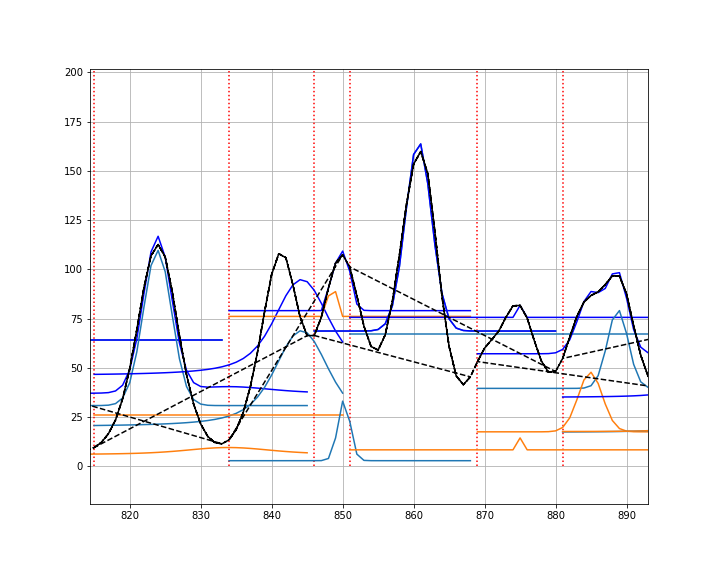

In [338]:
plotting.plot_all_fits(fsub_stop_2d_3_filt, 0);

<IPython.core.display.Javascript object>


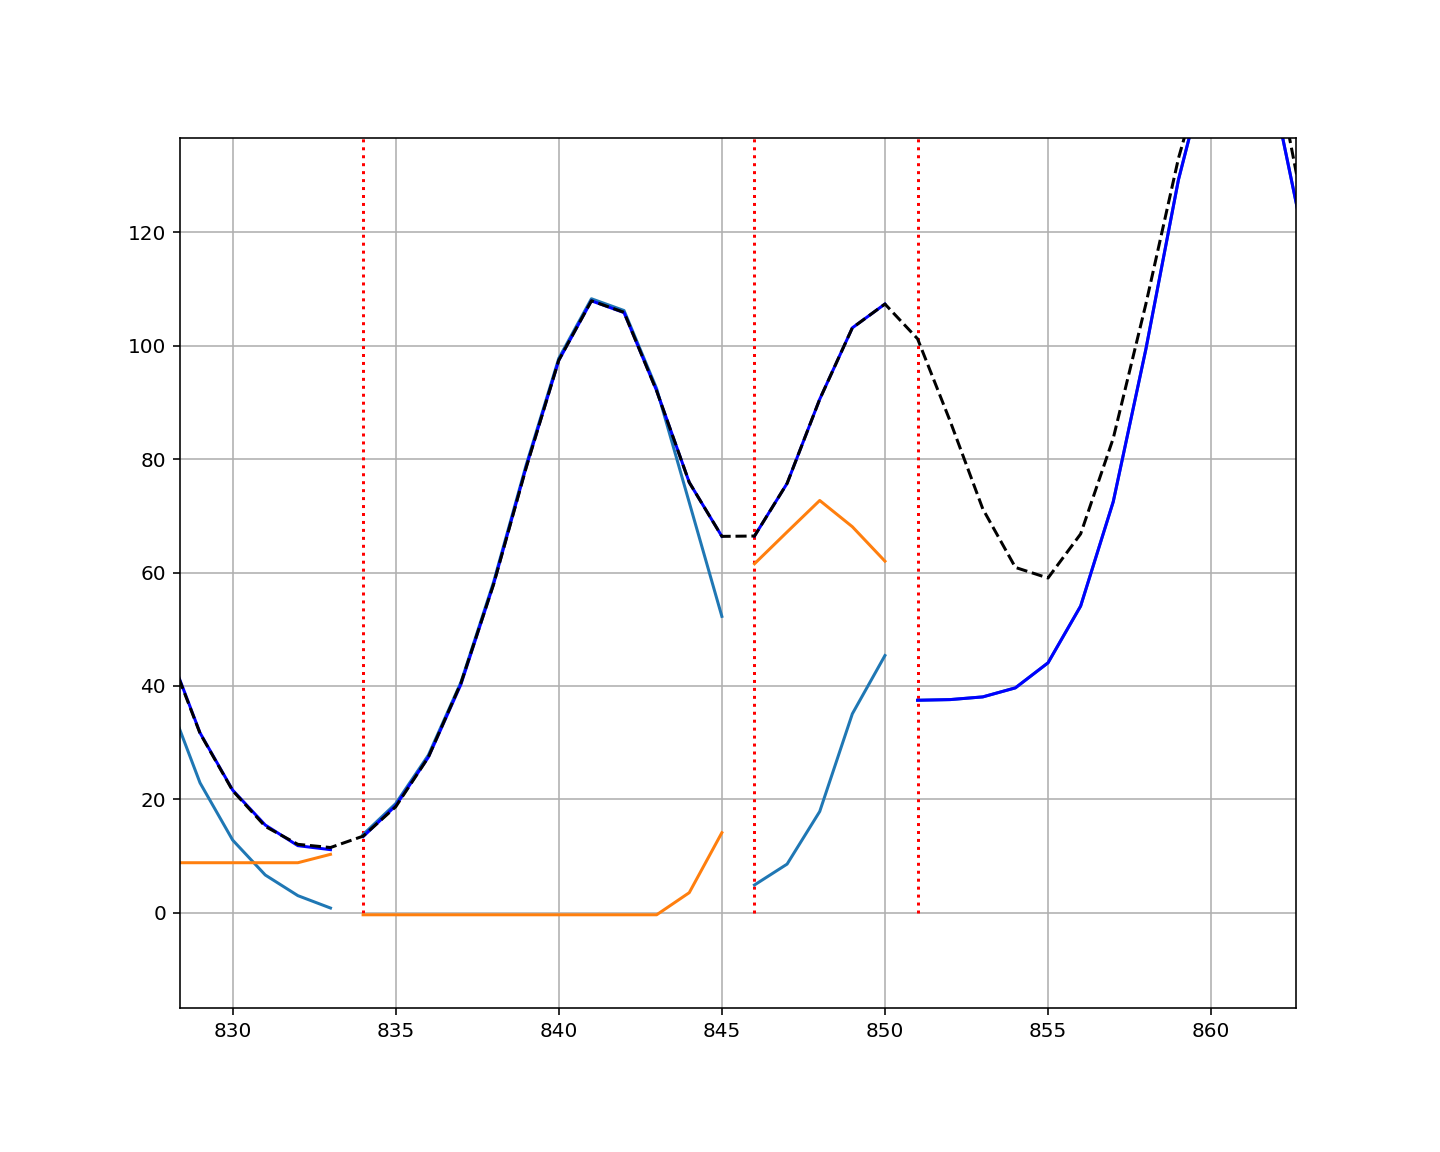

In [159]:
plotting.plot_all_fits(fsub_stop_2d_1_filt, 0);

In [169]:
%matplotlib notebook

<IPython.core.display.Javascript object>


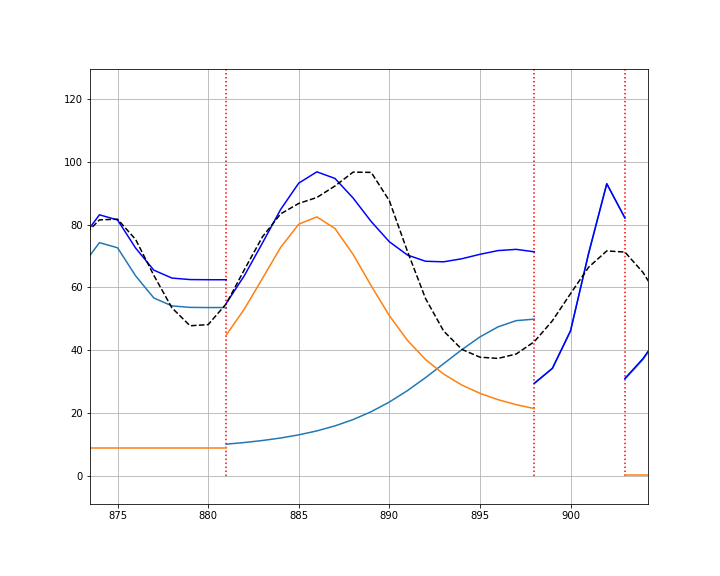

In [268]:
plotting.plot_all_fits(fitlists_final, 0);

<IPython.core.display.Javascript object>


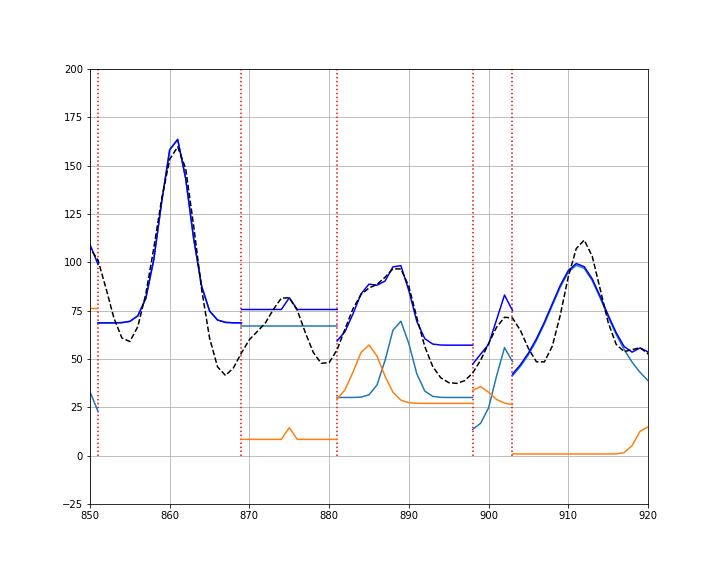

(-25.0, 200.0)

In [341]:
plotting.plot_all_fits(fitlists_final, 0);
plt.xlim(850, 920)
plt.ylim(-25, 200)

<IPython.core.display.Javascript object>


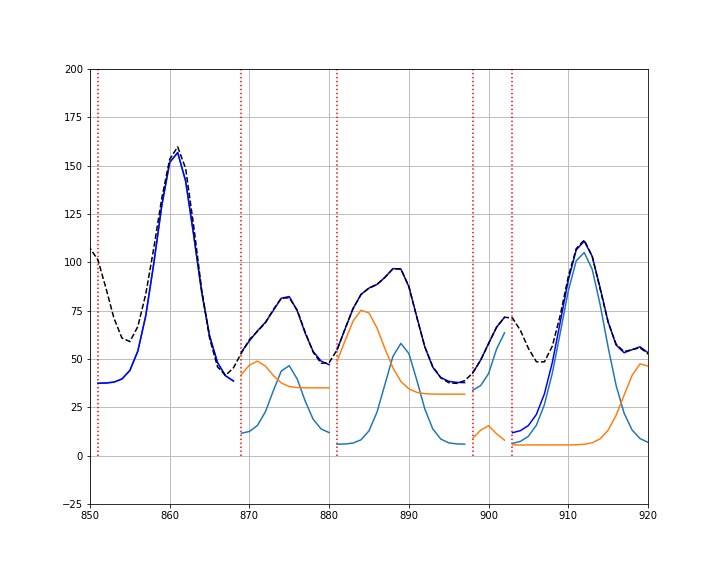

(-25.0, 200.0)

In [324]:
plotting.plot_all_fits(fsub_stop_2d_1_filt, 0);
plt.xlim(850, 920)
plt.ylim(-25, 200)

In [ ]:
fitlists_initial, fsub_stop_2d_3, fsub_stop_2d_3_filt, fitlists_final, tmp

<IPython.core.display.Javascript object>


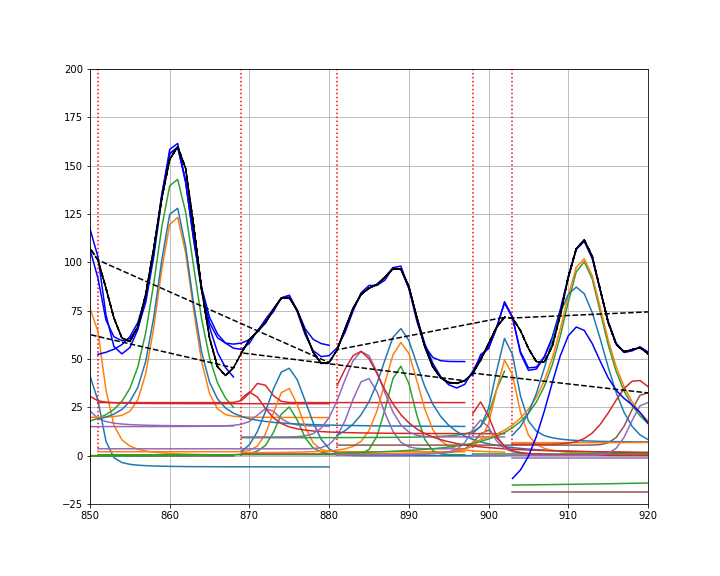

(-25.0, 200.0)

In [335]:
plotting.plot_all_fits(tmp, 0);
plt.xlim(850, 920)
plt.ylim(-25, 200)

encountered empty peak set. skipping filtering at location 36
initial peak count: 87
final peak count: 76


<IPython.core.display.Javascript object>


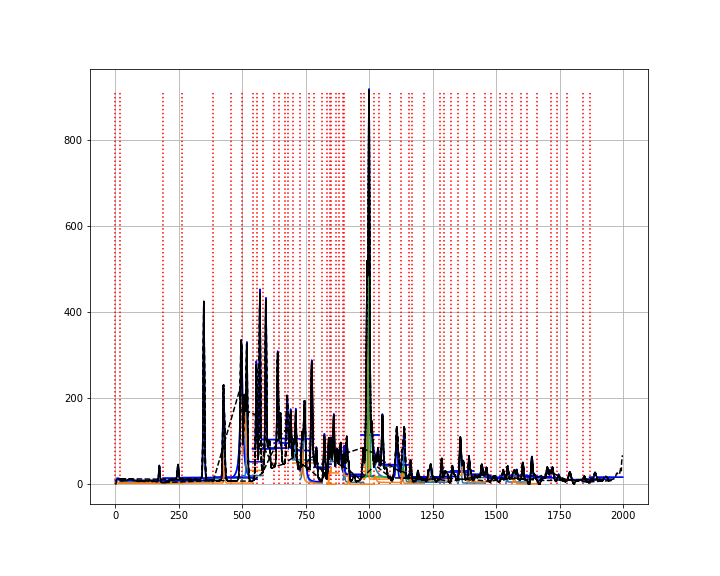

In [280]:
plotting.plot_all_fits(refinement.filter_peaks(fsub_stop_2d_3_filt, bounds, boundoffset = 0, buffer = 0.5), 0);

<IPython.core.display.Javascript object>


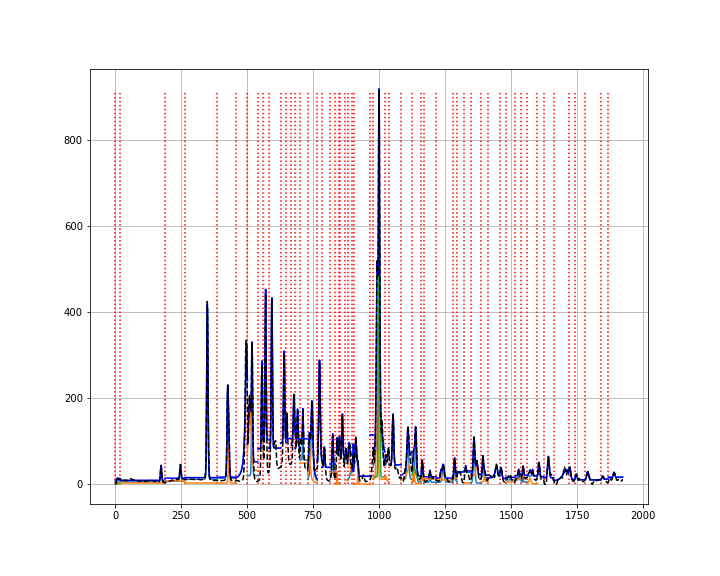

In [259]:
plotting.plot_all_fits(fitlists_final, 0);

In [211]:
[type(elt[0]) for elt in fsub_stop_2d_1_filt]

[numpy.ndarray, list, list, list, list, list]

In [70]:
[type(elt[0]) for elt in fitlists_final]

[numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray]

In [72]:
[len(elt[0]) for elt in fitlists_final]

[2000, 54, 56, 56, 56, 54]

(array([[ 0.        ,  0.        ,  0.        , ..., 66.07506293,
          0.        ,  0.        ]]),
 array([list([{'curve 0': {'FWHM': 7.729444244542533, 'area': 1423.9735271255815, 'area_err': 5.6920071660471194e-06, 'x0': 13.839041094941186}, 'curve 1': {'FWHM': 4.7118816003164605, 'area': 427.9815687072053, 'area_err': 2.8160495853810433e-08, 'x0': 19.89999988669206}, 'curve 2': {'FWHM': 3.695143772690854, 'area': 383.6180165882813, 'area_err': 5.337904013702966e-07, 'x0': 8.084622053052609}}, {'curve 0': {'FWHM': 5.610999503986535, 'area': 2198.7070042789996, 'area_err': 2.3127885775813765e-05, 'x0': 174.05717945448507}, 'curve 1': {'FWHM': 52.460258793946565, 'area': 1323.1054220149629, 'area_err': 1.4689421035273962e-11, 'x0': 23.966151620496394}}, {'curve 0': {'FWHM': 6.239310525732909, 'area': 1971.530111996506, 'area_err': 1.1136829005872761e-07, 'x0': 247.54237050230356}, 'curve 1': {'FWHM': 65.63898696307888, 'area': 1980.689844851076, 'area_err': 2.1990074703948935e-11,